# Analysis: Effects of Regime changes on National Social Factors


August 2021, U.S. officially withdraws from Afghanistan after 20 years. Ever since U.S. announced its withdrawl policy from Afghanistan, and post its hasty withdrawl, there seems to be a common belief amongst the masses that, following the takeover by Taliban, there will be widespread anarchy and destruction of social compass of society. Only time will tell us how gruesome this takeover by taliban turns out to be. 
    
Through this project, we aim to verify the affects of such drastic regime changes which have occured in last 70 years in some of the countries of the world. 
    
We are referring to the data archive provided by the United Nations: Department of Economic and Social Affairs. 



### Summary of Regime changes

The datasets for the below 6 countries from different continents have been manually created. 
  * Iraq
  * Myanmar
  * Afghanistan
  * Libya
  * Germany
  * Venezuela

An exhaustive list of events which can be considered as turning points in their respective countries has been considered using BBC website as our reference and established timelines of historical events of the mentioned countries. 


In [1]:
!pip install colour
!pip install adjustText

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colour import Color
from matplotlib.patches import Patch
from functions import *

## Loading the event file:
Below is the generation of dataframe from the Events file using the form_dataframe function. The 'Type' column in the dataframe indicates the category of event where as 'Event' column summarizes the details provided in the corresponding 'Description' column

In [3]:
events_df=form_dataframe('data/events_table.xlsx','Sheet1',0)
events_df

,Country,Year,Period,Type,Event,Description
0,Iraq,1958,1955-1960,Coup,Abd-al-Karim Qasim takes charge,Monarchy is overthrown in a left-wing military...
1,Iraq,1963,1960-1965,Coup,Qasim's government overthrown,Prime Minister Qasim is ousted in a coup led b...
2,Iraq,1968,1965-1970,Coup,A Baathist coup,A Baathist led-coup puts Ahmad Hasan al-Bakr i...
3,Iraq,1979,1975-1980,Coup,Saddam Hussein seizes power,Saddam Hussein takes over from President Al-Bakr.
4,Iraq,2006,2005-2010,Liberation/Revolution,New Government after elections,Newly re-elected President Talabani asks Shia ...
5,Iraq,2011,2010-2015,Transition,Broad Government,Shia politician Haider al-Abad forms a broad-b...
6,Myanmar,1948,1945-1950,Independence,Myanmar achieves Independence,Myanmar becomes independent
7,Myanmar,1958,1955-1960,Coup,Split in AFPFL party,"Caretaker government, led by army Chief of St..."
8,Myanmar,1962,1960-1965,Coup,Burmese Socialism,U Nu's faction ousted in military coup led by ...
9,Myanmar,1974,1970-1975,Transition,New Constitution,"New constitution comes into effect, transferri..."


## Loading of DataFrames based on Social Factors
The excel sheets derived from the United Nations: Department of Economic and Social Affairs had few unstructured headers. 

The display_dataframe calls a function 'transform_dataframe' which is created with an aim to clean and transform individual dataframe which contain social statistics such as male mortality, life expectancy, etc. The function joins the country with the parent region from a differnt row in the source excel file and merges them into a single row for each of the country.

Hence, the display dataframe finally generates a dataframe for all the selected countries for specific social factor. The name of the dataframe explains the data being loaded from the data sheet.

*Mortality all gender means number of deaths over a given period. It is expressed in thousands.*

In [4]:
mortality_all_gender=display_dataframe('data/WPP2019_MORT_F03_1_DEATHS_BOTH_SEXES.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'mortality_all_gender')
mortality_all_gender

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,...,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,307.285,319.453,331.580,347.022,...,380.302,412.441,436.699,500.832,507.661,460.847,449.526,432.628,443.353,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,21.263,22.313,22.273,22.249,...,23.620,24.191,23.963,23.700,24.602,27.090,28.356,28.588,29.942,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,6.897,7.350,8.631,11.146,...,17.655,23.395,26.743,33.592,34.569,38.237,38.416,38.215,33.657,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,127.951,127.837,127.029,133.357,...,148.498,161.478,174.239,167.967,140.444,135.248,140.451,133.592,124.762,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,2849.527,2809.848,2776.291,2916.866,...,3525.572,4073.142,4211.784,4535.264,4682.732,4528.355,3944.135,3575.969,3594.097,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,2709.343,2628.685,2660.723,2749.871,...,2754.899,2765.615,2692.366,2646.674,2687.218,2681.531,2661.948,2780.665,3006.133,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,3934.205,4178.169,4437.632,4737.339,...,4852.089,4756.026,4614.786,4504.374,4341.218,4204.730,4211.824,4442.795,4618.754,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,18.695,19.661,19.412,20.740,...,21.516,20.761,19.972,19.495,19.526,19.138,19.764,19.829,21.281,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,390.326,421.293,461.699,512.940,...,564.195,585.830,623.960,660.926,689.389,701.628,681.107,696.369,742.378,Western Europe


*Mortality male means number of male deaths over a given period. It is expressed in thousands.*

In [5]:
mortality_male=display_dataframe('data/WPP2019_MORT_F03_2_DEATHS_MALE.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'mortality_male')
mortality_male

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,...,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,157.344,163.897,170.075,178.333,...,195.046,211.171,221.815,254.883,259.437,235.899,235.278,227.734,234.233,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,11.082,11.690,11.659,11.636,...,12.426,12.701,12.568,12.418,12.896,14.274,14.974,15.197,16.048,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,3.581,3.817,4.492,5.800,...,9.301,12.346,14.109,17.800,18.355,20.154,20.779,21.017,18.936,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,66.219,66.317,66.351,69.720,...,78.354,85.379,91.773,89.566,74.249,72.529,75.463,71.860,66.972,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,1467.999,1451.186,1444.213,1520.296,...,1844.415,2131.713,2219.100,2409.103,2487.247,2387.745,2096.953,1927.974,1948.321,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,1374.386,1339.545,1363.817,1420.727,...,1437.552,1434.341,1397.445,1373.139,1381.870,1370.082,1360.752,1402.949,1502.009,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,1963.643,2134.778,2249.134,2366.510,...,2339.811,2247.310,2141.214,2093.930,2023.907,1973.691,2007.366,2154.555,2285.197,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,10.439,10.855,10.679,11.438,...,11.532,10.872,10.356,9.836,9.825,9.472,9.770,9.749,10.682,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,203.445,225.094,254.438,285.229,...,313.779,320.059,329.913,337.060,342.931,341.990,331.674,341.596,363.737,Western Europe


*Mortality female means number of female deaths over a given period. It is expressed in thousands.*

In [6]:
mortality_female=display_dataframe('data/WPP2019_MORT_F03_3_DEATHS_FEMALE.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'mortality_female')
mortality_female

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,...,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,149.941,155.556,161.505,168.689,...,185.256,201.270,214.884,245.949,248.224,224.948,214.248,204.894,209.120,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,10.181,10.623,10.614,10.613,...,11.194,11.490,11.395,11.282,11.706,12.816,13.382,13.391,13.894,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,3.316,3.533,4.139,5.346,...,8.354,11.049,12.634,15.792,16.214,18.083,17.637,17.198,14.721,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,61.732,61.520,60.678,63.637,...,70.144,76.099,82.466,78.401,66.195,62.719,64.988,61.732,57.790,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,1381.528,1358.662,1332.078,1396.570,...,1681.157,1941.429,1992.684,2126.161,2195.485,2140.610,1847.182,1647.995,1645.776,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,1334.957,1289.140,1296.906,1329.144,...,1317.347,1331.274,1294.921,1273.535,1305.348,1311.449,1301.196,1377.716,1504.124,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,1970.562,2043.391,2188.498,2370.829,...,2512.278,2508.716,2473.572,2410.444,2317.311,2231.039,2204.458,2288.240,2333.557,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,8.256,8.806,8.733,9.302,...,9.984,9.889,9.616,9.659,9.701,9.666,9.994,10.080,10.599,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,186.881,196.199,207.261,227.711,...,250.416,265.771,294.047,323.866,346.458,359.638,349.433,354.773,378.641,Western Europe


Unlike other Excel files, mortality by age has a different structure where the period is already in the single column and does not require to go through melt function. So there are multiple rows for each of the countries. Considering this and handling of this exception, it is directly concatenated with the final dataframe.

*Mortality by age means number of deaths by  year age group over a given period. It is expressed in thousands.*

In [7]:
mortality_by_age=display_dataframe('data/WPP2019_MORT_F04_1_DEATHS_BY_AGE_BOTH_SEXES.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'mortality_by_age',
                                   from_column=7,to_column=-1,rename_flag=True)
mortality_by_age

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,Period,mortality_by_age 0-4,mortality_by_age 5-9,mortality_by_age 10-14,...,mortality_by_age 55-59,mortality_by_age 60-64,mortality_by_age 65-69,mortality_by_age 70-74,mortality_by_age 75-79,mortality_by_age 80-84,mortality_by_age 85-89,mortality_by_age 90-94,mortality_by_age 95+,Region
0,365,Estimates,Burundi,108,Country/Area,910,1950-1955,157.390,19.334,8.643,...,8.334,8.914,9.890,10.139,8.356,4.873,1.896,0.489,0.076,Eastern Africa
14,366,Estimates,Burundi,108,Country/Area,910,1955-1960,166.149,21.009,8.639,...,8.878,9.343,9.696,10.016,8.368,5.300,2.055,0.477,0.075,Eastern Africa
28,367,Estimates,Burundi,108,Country/Area,910,1960-1965,170.158,23.110,9.608,...,9.346,10.234,10.484,10.149,8.616,5.588,2.381,0.559,0.078,Eastern Africa
42,368,Estimates,Burundi,108,Country/Area,910,1965-1970,178.567,23.941,10.681,...,9.681,10.698,11.431,10.970,8.781,5.832,2.579,0.672,0.095,Eastern Africa
56,369,Estimates,Burundi,108,Country/Area,910,1970-1975,187.620,25.318,11.539,...,10.096,11.308,12.410,12.626,10.811,6.690,2.790,0.771,0.123,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38542,3524,Estimates,Switzerland,756,Country/Area,926,1995-2000,2.405,0.274,0.320,...,11.350,15.218,21.560,31.649,41.766,53.130,58.647,37.376,12.331,Western Europe
38556,3525,Estimates,Switzerland,756,Country/Area,926,2000-2005,2.040,0.208,0.280,...,11.757,14.896,19.788,28.469,40.773,51.752,55.872,42.266,15.667,Western Europe
38570,3526,Estimates,Switzerland,756,Country/Area,926,2005-2010,1.830,0.195,0.223,...,10.955,15.531,19.462,25.805,37.397,53.855,56.738,41.893,19.528,Western Europe
38584,3527,Estimates,Switzerland,756,Country/Area,926,2010-2015,1.834,0.145,0.169,...,10.602,14.881,21.346,26.416,36.247,53.658,66.442,49.563,23.575,Western Europe


*Life expectancy all gender means average number of years of life expected by a hypothetical cohort of individuals who would be subject during all their lives to the mortality rates of a given period. It is expressed as years.*

In [8]:
life_expectancy_all_gender=display_dataframe('data/WPP2019_MORT_F07_1_LIFE_EXPECTANCY_0_BOTH_SEXES.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'life_expectancy_all_gender')
life_expectancy_all_gender

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,...,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,39.027,40.525,42.033,43.529,...,46.291,47.277,48.509,47.031,47.321,51.418,55.267,58.917,61.025,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,38.721,40.465,42.472,44.476,...,49.060,52.288,55.290,57.820,59.287,59.602,60.886,62.825,63.983,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,41.038,42.949,45.176,47.349,...,52.554,54.674,56.113,57.019,57.020,57.292,59.050,61.555,66.540,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,34.076,36.676,40.081,42.145,...,45.909,47.334,48.685,50.772,53.971,56.699,60.707,63.424,65.743,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,34.080,36.675,40.080,42.144,...,44.259,43.517,46.153,48.069,50.702,53.614,59.080,63.697,65.967,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,67.265,69.394,70.745,71.455,...,73.661,74.768,76.131,77.345,78.449,79.601,80.952,81.939,82.457,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,67.523,68.908,69.975,70.666,...,72.301,73.647,74.993,75.981,77.311,78.620,79.732,80.445,81.101,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,65.979,67.544,69.123,69.781,...,71.441,72.884,74.495,75.765,76.987,78.315,79.505,81.145,81.998,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,71.930,72.942,73.464,73.639,...,75.174,76.135,76.724,77.261,77.843,78.670,80.178,81.305,82.060,Western Europe


*Life expectancy male means average number of years of life expected by a hypothetical cohort of males who would be subject during all their lives to the mortality rates of a given period. It is expressed as years.*

In [9]:
life_expectancy_male=display_dataframe('data/WPP2019_MORT_F07_2_LIFE_EXPECTANCY_0_MALE.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'life_expectancy_male')
life_expectancy_male

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,...,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,37.46,38.95,40.44,41.92,...,44.83,45.81,47.19,45.61,45.73,49.93,53.56,57.13,59.22,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,37.50,39.00,41.00,43.00,...,47.41,50.70,53.72,56.27,57.75,58.01,59.31,61.20,62.27,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,39.72,41.64,43.87,46.04,...,51.03,53.15,54.61,55.42,55.39,55.85,57.60,60.04,64.58,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,32.80,35.30,38.58,40.64,...,44.28,45.73,47.21,48.98,52.27,54.70,58.74,61.37,63.60,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,32.80,35.30,38.58,40.64,...,42.77,42.10,44.70,46.57,49.26,52.31,57.57,61.92,64.09,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,64.24,66.08,67.23,67.74,...,69.66,70.73,72.05,73.23,74.55,75.91,77.46,78.70,79.44,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,65.30,66.30,67.12,67.61,...,68.89,70.20,71.59,72.54,74.02,75.59,76.99,77.94,78.67,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,63.19,64.59,66.00,66.55,...,67.80,69.34,70.73,72.24,73.60,75.13,76.73,78.76,79.84,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,70.64,71.24,71.19,71.01,...,71.98,72.81,73.46,74.22,75.07,76.24,78.01,79.36,80.32,Western Europe


*Life expectancy female means average number of years of life expected by a hypothetical cohort of females who would be subject during all their lives to the mortality rates of a given period. It is expressed as years.*

In [10]:
life_expectancy_female=display_dataframe('data/WPP2019_MORT_F07_3_LIFE_EXPECTANCY_0_FEMALE.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'life_expectancy_female')
life_expectancy_female

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,...,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,40.59,42.09,43.61,45.12,...,47.72,48.69,49.76,48.41,48.85,52.88,56.95,60.68,62.80,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,40.00,42.00,44.00,46.00,...,50.76,53.91,56.89,59.40,60.85,61.24,62.51,64.50,65.76,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,42.38,44.29,46.51,48.68,...,54.10,56.24,57.66,58.67,58.71,58.78,60.54,63.24,68.74,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,35.39,38.09,41.63,43.70,...,47.60,49.01,50.21,52.65,55.73,58.79,62.74,65.55,67.96,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,35.39,38.09,41.63,43.70,...,45.80,45.00,47.67,49.64,52.21,54.96,60.63,65.51,67.88,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,70.17,72.60,74.20,75.18,...,77.77,78.89,80.26,81.48,82.33,83.21,84.31,85.04,85.36,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,69.60,71.30,72.56,73.42,...,75.33,76.68,77.98,79.12,80.35,81.46,82.37,82.91,83.55,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,69.04,70.76,72.46,73.22,...,75.22,76.41,78.18,79.14,80.23,81.37,82.17,83.45,84.15,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,73.24,74.67,75.81,76.36,...,78.43,79.45,79.92,80.19,80.49,80.96,82.20,83.14,83.77,Western Europe


*Mortality before 40 all gender means the probability of Dying between Age 0 and Age 40 (40q0) - Both Sexes. It is expressed as deaths under age 40 per 1,000 live births.*

In [11]:
mortality_b40_all_gender=display_dataframe('data/WPP2019_MORT_F08_1_Q0040_BOTH_SEXES.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'mortality_b40_all_gender')
mortality_b40_all_gender

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,...,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,483.09876,462.74348,442.40406,422.42521,...,375.37260,361.78933,344.63772,364.96280,361.20738,304.62826,278.53891,225.25498,197.33920,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,480.27429,455.47800,427.35875,399.49863,...,336.87592,292.70840,252.22161,218.98058,200.07995,195.98382,179.74552,155.58572,141.42896,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,455.69314,429.98627,400.57534,372.04641,...,303.59129,276.41675,258.28801,248.03995,250.55321,249.13414,226.26831,193.37915,129.72708,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,551.90496,515.54671,468.79122,440.85534,...,390.04270,370.93623,352.90461,324.91334,281.12121,241.44014,175.43391,136.99440,108.73141,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,551.92519,515.56086,468.72558,440.77679,...,412.59341,422.09025,387.92872,363.82884,332.49756,298.41391,227.64734,168.75321,139.77725,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,98.16866,77.43278,65.73637,60.29279,...,47.41241,43.36215,39.19315,37.73827,30.35908,25.41380,21.37314,18.74098,16.56963,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,99.70073,82.66094,71.08125,61.76413,...,50.81185,41.59832,34.08407,31.66835,26.09503,21.50517,17.99208,16.10054,15.53499,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,102.54227,86.99238,72.54631,61.51874,...,52.64986,46.58763,39.04846,37.69161,29.86494,26.57888,20.39422,16.13015,14.01152,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,59.63422,49.52749,44.87345,42.52320,...,33.53556,29.42920,26.76747,25.22743,22.58039,20.24107,16.65766,14.28093,12.13606,Western Europe


*Mortality before 40 male means the probability of Dying between Age 0 and Age 40 (40q0) - Male. It is expressed as deaths under age 40 per 1,000 live births.*

In [13]:
mortality_b40_male=display_dataframe('data/WPP2019_MORT_F08_2_Q0040_MALE.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'mortality_b40_male')
mortality_b40_male

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,...,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,500.19702,479.65224,459.31821,439.30308,...,385.98592,372.11711,352.53427,374.88100,373.43151,314.63007,291.82808,240.82034,212.15105,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,489.65256,467.96762,439.33025,410.99110,...,349.68611,303.65115,262.42988,228.48729,209.12336,205.74274,189.02581,165.15200,151.92435,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,469.06807,443.08348,413.46252,384.65249,...,318.41763,291.13925,272.70617,263.69835,266.28825,261.53267,237.89695,206.48520,147.14747,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,565.53270,530.26898,484.74586,456.60190,...,407.29545,387.90833,368.06353,344.50355,298.90247,262.35887,195.22639,150.88862,122.69394,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,565.55311,530.27740,484.73329,456.59955,...,428.18139,436.84651,403.03024,379.22378,346.18537,308.16075,239.60349,184.46516,155.93235,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,112.51834,92.35435,80.43376,75.01183,...,61.21110,56.82252,52.54941,51.80067,40.98352,34.19879,28.63087,24.96621,21.61034,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,117.91808,97.78319,85.33596,75.41388,...,63.89706,52.56624,43.45427,41.58304,34.20073,27.89999,23.09654,20.34418,19.87322,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,122.76974,106.28398,90.30601,76.27822,...,68.14910,58.75773,52.23813,49.26769,38.44592,36.09266,25.70379,19.67438,16.85266,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,67.75670,57.72324,54.15495,51.63611,...,40.73446,35.87308,32.35756,30.69424,27.35282,24.35308,19.92273,16.80939,14.23520,Western Europe


*Mortality before 40 female means the probability of Dying between Age 0 and Age 40 (40q0) - Female. It is expressed as deaths under age 40 per 1,000 live births.*

In [14]:
mortality_b40_female=display_dataframe('data/WPP2019_MORT_F08_3_Q0040_FEMALE.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'mortality_b40_female')
mortality_b40_female

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,...,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,466.03984,445.79843,425.46393,405.49165,...,364.74187,351.43423,336.72765,355.05003,349.08353,294.70037,264.97799,209.43375,182.25038,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,470.48082,442.53991,414.88158,387.51630,...,323.44972,281.25699,241.58261,209.09383,190.66792,185.81084,170.06366,145.58714,130.43912,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,441.85506,416.46008,387.28673,359.04943,...,288.12460,260.90254,243.08427,231.50236,233.88586,236.16219,213.33760,178.51801,110.33822,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,537.62143,500.14406,452.00657,424.28954,...,371.90595,353.10678,337.03246,304.38770,262.66257,219.80939,154.92713,122.55555,94.16559,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,537.62279,500.19143,451.97818,424.26664,...,396.65304,407.07225,372.49573,348.20111,318.58751,288.41159,215.32125,152.51868,123.04786,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,83.21437,61.79234,50.21974,44.62357,...,32.77158,29.28049,25.38880,23.33061,19.56010,16.51906,14.05024,12.49319,11.54386,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,82.06124,67.72302,56.38368,47.14918,...,36.75081,29.85810,24.09692,21.12792,17.53766,14.81566,12.68862,11.67637,10.91022,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,80.55889,66.25568,53.54768,45.71242,...,36.08537,33.85637,25.20161,25.52910,20.95758,16.70073,14.97552,12.47079,11.05584,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,51.19046,41.01253,35.15414,32.85646,...,25.87323,22.62249,20.89365,19.48343,17.58090,15.95907,13.27951,11.66627,9.95799,Western Europe


*Mortality before 60 all gender means the probability of Dying between Age 0 and Age 60 (60q0) - Both Sexes. It is expressed as deaths under age 60 per 1,000 live births.*

In [15]:
mortality_b60_all_gender=display_dataframe('data/WPP2019_MORT_F09_1_Q0060_BOTH_SEXES.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'mortality_b60_all_gender')
mortality_b60_all_gender

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,...,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,647.91497,627.24490,606.25053,585.27393,...,553.52925,546.67718,537.83131,561.07467,561.04111,495.70525,437.26654,383.74551,351.67623,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,665.42336,640.99838,612.45083,583.42272,...,516.39369,468.58686,422.77916,383.51989,360.49470,355.52357,335.11096,304.23407,285.76116,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,620.56657,593.82392,562.32151,531.70973,...,457.78862,426.89674,405.82123,397.02018,409.35145,412.38713,380.35795,337.83604,261.50032,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,714.88748,680.26920,633.81438,605.11426,...,557.75652,540.07698,522.92664,497.31172,460.14237,434.91028,368.34146,322.55852,282.66190,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,714.93433,680.60143,634.20148,605.39709,...,575.25299,585.84887,549.42509,528.15047,507.80092,479.42912,387.25188,306.27453,270.45079,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,239.87280,210.24951,191.81504,183.31390,...,160.85906,148.90581,135.40773,124.76714,111.91395,102.84889,92.87200,83.68503,79.88395,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,218.42872,197.76911,183.28134,172.89920,...,158.12308,144.47903,130.63258,122.26245,107.27142,96.21847,86.09469,78.72111,76.10145,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,249.66338,225.35764,203.28231,195.18269,...,173.61847,157.80685,140.16267,128.05733,112.46717,101.17884,87.35480,71.74308,64.40263,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,156.47120,142.15904,138.65380,139.06660,...,122.93164,112.56313,106.01320,98.64349,92.29254,86.28849,73.99358,64.86822,59.02244,Western Europe


*Mortality before 60 male means the probability of Dying between Age 0 and Age 60 (60q0) - Male. It is expressed as deaths under age 60 per 1,000 live births.*

In [16]:
mortality_b60_male=display_dataframe('data/WPP2019_MORT_F09_2_Q0060_MALE.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'mortality_b60_male')
mortality_b60_male

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,...,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,675.68441,655.24872,634.56713,613.81004,...,581.70219,575.52577,566.13638,591.86141,594.20788,525.46121,465.70729,415.26155,383.16105,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,690.47162,669.59949,641.22339,612.27597,...,547.57544,498.18074,451.47519,411.15994,387.35248,383.16938,362.12359,331.38930,313.86580,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,644.52763,617.76690,586.15441,555.50608,...,484.36973,453.31528,431.87546,425.54269,438.78138,437.66111,403.90281,361.94667,291.99788,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,737.75702,704.83237,660.34596,631.76481,...,584.36762,566.25425,547.49089,525.70266,489.07961,474.66979,404.89339,361.24103,322.10068,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,737.77353,704.83959,660.34876,631.77555,...,601.41735,611.24667,575.40731,555.43867,533.34063,500.71120,411.62554,335.12234,300.32957,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,291.49269,263.84692,246.10130,238.16254,...,216.71843,203.59264,186.52633,172.14670,153.03118,140.03237,125.70703,112.11519,105.74648,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,256.91865,241.88040,228.32723,218.98202,...,205.35435,188.96378,170.77518,160.80193,140.36048,124.94233,111.34533,100.76703,98.63460,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,301.81169,278.92749,257.27358,250.74892,...,230.18291,203.85247,184.94638,164.73889,145.01989,130.06556,110.49976,89.88391,79.28906,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,177.76150,169.49492,173.16041,175.71612,...,156.81548,142.86113,132.44519,120.58133,110.06795,100.52081,84.63948,72.45164,70.38485,Western Europe


*Mortality before 60 female means the probability of Dying between Age 0 and Age 60 (60q0) - Female. It is expressed as deaths under age 60 per 1,000 live births.*

In [17]:
mortality_b60_female=display_dataframe('data/WPP2019_MORT_F09_3_Q0060_FEMALE.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'mortality_b60_female')
mortality_b60_female

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,...,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,621.01514,600.18102,578.91708,557.66275,...,527.06125,519.71423,511.50154,532.30193,529.27572,466.60898,408.84267,352.48714,320.86914,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,639.49234,611.36045,582.82696,553.94242,...,484.44872,438.40487,393.46039,355.11369,332.75130,326.77974,307.10441,276.15759,256.60108,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,596.07365,569.38111,538.04534,507.52935,...,430.53254,399.63457,378.86292,367.34826,378.58336,386.14179,354.63858,310.39852,226.57895,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,691.75130,655.31338,606.58572,577.66859,...,530.10199,512.80718,497.37399,467.62698,430.35920,393.79138,330.78832,282.65568,242.01600,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,691.76976,655.34567,606.58558,577.65345,...,547.98686,559.34589,522.32603,499.84905,481.80186,458.28289,363.12174,277.52698,240.37288,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,189.50863,155.36223,135.63954,126.47571,...,102.39685,91.70142,82.01935,75.29220,69.33879,64.89959,59.89329,55.38127,54.21333,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,184.02521,158.18382,143.58710,133.40748,...,114.94660,100.67068,88.54874,81.10828,72.22302,65.99112,59.75899,55.82340,52.62462,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,194.01848,168.41642,146.40552,138.08272,...,116.69712,110.65129,92.51475,88.85671,77.63531,70.19292,62.76326,52.43759,48.28152,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,135.27757,115.08862,104.28652,102.38048,...,88.77141,81.57028,78.43107,75.45035,73.48717,71.39564,63.00173,57.07905,47.31815,Western Europe


*Mortality before 80 all gender means the probability of Dying between Age 0 and Age 80 (80q0) - Both Sexes. It is expressed as deaths under age 80 per 1,000 live births.*

In [18]:
mortality_b80_all_gender=display_dataframe('data/WPP2019_MORT_F14_1_LIFE_EXPECTANCY_80_BOTH_SEXES.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'mortality_b80_all_gender')
mortality_b80_all_gender

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,...,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,4.442397,4.574217,4.704512,4.830041,...,4.878312,4.852028,4.827468,4.750726,4.742278,4.975561,5.611328,5.709072,5.767884,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,4.440661,4.545112,4.657777,4.764729,...,4.983675,5.100879,5.210135,5.304132,5.360058,5.371695,5.420757,5.493560,5.536959,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,4.611473,4.765306,4.956796,5.107970,...,5.412379,5.541319,5.632814,5.716434,5.803363,5.874498,5.932273,6.064232,6.300955,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,4.014189,4.251017,4.544676,4.714506,...,4.909015,4.969221,5.028626,5.126936,5.228330,5.332462,5.919241,6.144692,6.262426,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,4.026119,4.262029,4.555735,4.726439,...,4.914877,4.818769,5.029615,5.149214,5.386285,5.660367,5.981266,6.229494,6.321506,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,5.625990,5.910129,6.165332,6.453717,...,7.036187,7.260441,7.771217,8.339306,8.623757,8.996159,9.589386,10.004110,10.141866,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,5.403836,5.486040,5.603152,5.679896,...,6.081953,6.397183,6.777529,7.246557,7.729933,8.149872,8.458205,8.652151,9.278767,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,5.413260,5.607711,5.860293,5.925222,...,6.247471,6.621342,7.080541,7.462120,7.809493,8.359104,8.606137,8.956147,9.251040,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,5.981327,6.065691,6.320969,6.537757,...,7.141317,7.450801,7.565494,7.612457,7.697598,7.886730,8.426220,8.831460,9.077021,Western Europe


*Mortality before 80 male means the probability of Dying between Age 0 and Age 80 (80q0) - Male. It is expressed as deaths under age 80 per 1,000 live births.*

In [19]:
mortality_b80_male=display_dataframe('data/WPP2019_MORT_F14_2_LIFE_EXPECTANCY_80_MALE.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'mortality_b80_male')
mortality_b80_male

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,...,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,4.161031,4.284210,4.407698,4.527621,...,4.639178,4.614464,4.582240,4.490510,4.461871,4.692789,5.295057,5.401211,5.437178,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,4.235689,4.314850,4.418520,4.518361,...,4.709040,4.822930,4.931445,5.025874,5.082527,5.092059,5.141500,5.213371,5.255537,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,4.349198,4.504360,4.686901,4.840273,...,5.137238,5.273125,5.368760,5.459527,5.553483,5.628834,5.685859,5.822992,6.013767,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,3.757023,3.976103,4.253654,4.423280,...,4.652518,4.720674,4.789021,4.857894,4.927158,4.997159,5.529482,5.634831,5.725758,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,3.757423,3.976225,4.253236,4.423483,...,4.622698,4.542869,4.764420,4.905020,5.163917,5.432510,5.747561,5.987491,6.060368,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,5.023331,5.244958,5.426866,5.628718,...,6.002568,6.157262,6.559649,7.038937,7.267600,7.647120,8.207723,8.705049,8.898382,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,5.231237,5.203063,5.268689,5.253820,...,5.384096,5.551744,5.795926,6.156129,6.571335,7.037850,7.451659,7.718360,8.527928,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,5.024732,5.185186,5.383076,5.249038,...,5.316245,5.511585,5.830409,6.140191,6.430175,7.055294,7.362045,7.856150,8.277627,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,5.804406,5.848725,6.029247,6.174515,...,6.356791,6.397387,6.356054,6.342339,6.432311,6.698776,7.276796,7.726327,8.403513,Western Europe


*Mortality before 80 fmale means the probability of Dying between Age 0 and Age 80 (80q0) - Female. It is expressed as deaths under age 80 per 1,000 live births.*

In [20]:
mortality_b80_female=display_dataframe('data/WPP2019_MORT_F14_3_LIFE_EXPECTANCY_80_FEMALE.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'mortality_b80_female')
mortality_b80_female

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,...,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,4.656950,4.782540,4.906486,5.030654,...,5.057552,5.030504,5.002928,4.924106,4.910433,5.139038,5.806386,5.910682,5.990058,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,4.609324,4.725201,4.836916,4.944485,...,5.175617,5.293244,5.401456,5.495852,5.551420,5.566301,5.617153,5.692757,5.741096,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,4.807134,4.961252,5.147803,5.305546,...,5.611180,5.735536,5.822537,5.906133,5.992438,6.063579,6.130233,6.266423,6.547703,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,4.204815,4.442423,4.743727,4.912456,...,5.084861,5.142550,5.200557,5.327526,5.457965,5.591725,6.219835,6.548381,6.681973,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,4.204587,4.442413,4.743043,4.913173,...,5.110897,5.021379,5.249549,5.397225,5.641039,5.908280,6.208439,6.449594,6.552143,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,5.995640,6.303905,6.574985,6.877873,...,7.537635,7.828160,8.421294,9.057310,9.398661,9.787773,10.426483,10.819974,10.970056,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,5.534111,5.703108,5.841776,5.950703,...,6.425614,6.809921,7.250581,7.744621,8.242884,8.641015,8.959909,9.209737,9.791504,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,5.752666,5.952353,6.228266,6.417871,...,6.818697,7.249172,7.751960,8.161822,8.535733,9.008433,9.268402,9.636840,9.926824,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,6.135815,6.258279,6.578431,6.844351,...,7.701820,8.129462,8.275881,8.322781,8.397334,8.554620,9.106139,9.546007,9.540956,Western Europe


*Total Population - Both Sexes. De facto population in a country, area or region as of 1 July of the year indicated. Figures are presented in thousands*

In [21]:
tot_population_all_gender=display_dataframe('data/WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'tot_population_all_gender')
tot_population_all_gender

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950,1951,1952,1953,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,2308.927,2360.442,2406.034,2449.089,...,9245.992,9540.302,9844.301,10160.034,10488.002,10827.010,11175.379,11530.577,11890.781,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,159.459,163.146,166.538,169.748,...,723.865,741.511,759.390,777.435,795.597,813.890,832.322,850.891,869.595,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,62.000,63.313,64.744,66.273,...,868.136,883.296,898.707,913.998,929.117,944.100,958.923,973.557,988.002,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,822.347,835.000,849.258,864.893,...,3250.104,3281.453,3311.444,3342.818,3376.558,3412.894,3452.797,3497.117,3546.427,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,18128.030,18466.973,18819.701,19184.288,...,92726.982,95385.793,98094.264,100835.453,103603.461,106399.926,109224.410,112078.727,114963.583,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,279,Estimates,Liechtenstein,438,Country/Area,926,13.752,13.945,14.135,14.344,...,36.615,36.940,37.219,37.465,37.655,37.805,37.918,38.020,38.137,Western Europe
224,280,Estimates,Luxembourg,442,Country/Area,926,296.005,297.593,299.500,301.507,...,530.855,542.554,554.512,566.741,579.266,591.914,604.244,615.730,625.976,Western Europe
225,281,Estimates,Monaco,492,Country/Area,926,20.000,19.384,19.082,19.049,...,36.459,36.899,37.320,37.723,38.070,38.392,38.682,38.967,39.244,Western Europe
226,282,Estimates,Netherlands,528,Country/Area,926,10042.051,10167.541,10297.986,10432.296,...,16791.850,16843.512,16892.517,16938.492,16981.285,17021.343,17059.560,17097.123,17134.873,Western Europe


*Migration means the net number of migrants, that is, the number of immigrants minus the number of emigrants. It is expressed as thousands.*

In [22]:
migration=display_dataframe('data/WPP2019_MIGR_F02_NET_NUMBER_OF_MIGRANTS.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'migration')
migration

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,...,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,-69.947,-70.048,-84.989,-57.900,...,-150.290,-139.146,-180.004,-320.001,-455.304,-24.721,30.004,-70.001,10.003,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,0.000,-6.116,-8.491,-5.500,...,10.000,-4.500,-4.500,-3.000,-6.000,-10.000,-10.000,-10.000,-10.000,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,0.999,5.000,18.000,25.000,...,91.193,9.999,89.998,-45.000,9.988,-8.997,-12.221,6.002,4.501,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,0.997,3.000,6.997,4.999,...,10.000,10.000,-40.000,-314.772,-129.998,227.290,-80.009,-246.000,-199.290,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,-19.999,-20.000,-19.999,-42.182,...,-2112.372,248.546,765.993,1457.943,-155.577,-150.001,-50.132,399.997,150.002,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,214.483,830.406,1417.869,491.613,...,258.429,291.570,276.383,122.170,193.631,926.483,446.120,423.831,182.636,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,-42.001,39.829,669.314,871.265,...,228.894,0.023,1683.737,2628.459,715.944,824.445,43.087,1938.576,2719.112,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,5.756,4.191,8.527,5.918,...,11.846,2.552,12.831,20.040,19.940,14.473,42.279,48.704,48.704,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,-84.929,-22.221,11.589,54.636,...,145.804,71.525,139.748,186.409,178.553,146.020,65.713,62.687,80.000,Western Europe


*Mean childbearing age means the average age of mothers at the birth of their children if women were subject throughout their lives to the age-specific fertility rates observed in a given year. It is expressed as years.*

In [23]:
mean_childbearing_age=display_dataframe('data/WPP2019_FERT_F08_MEAN_AGE_CHILDBEARING.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'mean_childbearing_age')
mean_childbearing_age

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,...,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,27,Estimates,Burundi,108,Country/Area,910,30.915,30.915,30.925,30.935,...,30.965,30.985,31.065,30.973,30.975,30.980,31.060,31.060,31.060,Eastern Africa
1,28,Estimates,Comoros,174,Country/Area,910,30.615,30.615,30.615,30.615,...,30.615,30.615,30.615,30.615,30.554,30.358,30.289,30.142,30.045,Eastern Africa
2,29,Estimates,Djibouti,262,Country/Area,910,32.280,32.160,32.036,31.917,...,31.770,31.692,31.636,31.593,31.754,31.914,32.076,32.085,32.159,Eastern Africa
3,30,Estimates,Eritrea,232,Country/Area,910,30.890,30.890,30.890,30.890,...,30.890,30.890,30.638,30.385,30.133,29.988,29.773,29.671,29.540,Eastern Africa
4,31,Estimates,Ethiopia,231,Country/Area,910,30.745,30.745,30.745,30.745,...,30.745,30.760,30.625,30.350,30.070,29.993,29.961,29.812,29.732,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,248,Estimates,France,250,Country/Area,926,28.557,28.308,27.950,27.785,...,27.128,27.607,28.424,29.111,29.730,30.009,30.363,30.705,31.199,Western Europe
193,249,Estimates,Germany,276,Country/Area,926,27.677,27.677,27.270,26.833,...,26.267,26.674,27.414,27.954,28.517,29.057,29.907,30.659,31.162,Western Europe
194,250,Estimates,Luxembourg,442,Country/Area,926,27.459,27.459,27.459,27.150,...,27.126,27.577,28.161,28.512,29.144,29.486,30.216,31.082,31.705,Western Europe
195,251,Estimates,Netherlands,528,Country/Area,926,30.701,30.088,29.393,28.505,...,27.493,28.024,28.896,29.701,30.210,30.405,30.658,30.828,30.943,Western Europe


## Consolidation of individual DataFrames
All the above derived dataframes for the social factors along with the events are consolidated into one dataframe for better understanding of data and easier visualization. The steps performed for consolidation are:
* Generating a list of dataframe from by melting the seperate year range columns of all the social factor related dataframes into one column termed as "Period" and then joining them all to form a common Dataframe. Notice that mortality by age is appended without melting as the data was already in single column as mentioned before.
* Merging the event dataframe with the common social factor dataframe as an outer join to avoid loss of events or data and forming a final consolidated Dataframe.
  

In [24]:
stat_dataframes=get_melted_dataframes([
                                       mortality_all_gender,
                                                  mortality_male,
                                                  mortality_female,
                                                  life_expectancy_all_gender,
                                                  life_expectancy_male,
                                                  life_expectancy_female,
                                                  mortality_b40_all_gender,
                                                  mortality_b40_male,
                                                  mortality_b40_female,
                                                  mortality_b60_all_gender,
                                                  mortality_b60_male,
                                                  mortality_b60_female,
                                                  mortality_b80_all_gender,
                                                  mortality_b80_male,
                                                  mortality_b80_female,
                                                  migration,
                                                  mean_childbearing_age
                                                  ])

In [25]:
stat2_dataframes=[]
stat2_dataframes.append(mortality_by_age)

In [26]:
consolidated_df=get_finalized_df(stat_dataframes,stat2_dataframes)

In [27]:
consolidated_df

,Country,Region,Period,mortality_all_gender,mortality_male,mortality_female,life_expectancy_all_gender,life_expectancy_male,life_expectancy_female,mortality_b40_all_gender,...,mortality_by_age 50-54,mortality_by_age 55-59,mortality_by_age 60-64,mortality_by_age 65-69,mortality_by_age 70-74,mortality_by_age 75-79,mortality_by_age 80-84,mortality_by_age 85-89,mortality_by_age 90-94,mortality_by_age 95+
0,Burundi,Eastern Africa,1950-1955,307.285,157.344,149.941,39.027,37.46,40.59,483.09876,...,8.140,8.334,8.914,9.890,10.139,8.356,4.873,1.896,0.489,0.076
1,Comoros,Eastern Africa,1950-1955,21.263,11.082,10.181,38.721,37.50,40.00,480.27429,...,0.683,0.697,0.785,0.828,0.848,0.725,0.508,0.120,0.000,0.000
2,Djibouti,Eastern Africa,1950-1955,6.897,3.581,3.316,41.038,39.72,42.38,455.69314,...,0.165,0.169,0.177,0.178,0.164,0.122,0.066,0.024,0.006,0.000
3,Eritrea,Eastern Africa,1950-1955,127.951,66.219,61.732,34.076,32.80,35.39,551.90496,...,2.801,3.075,3.525,3.938,4.025,3.287,1.820,0.682,0.190,0.039
4,Ethiopia,Eastern Africa,1950-1955,2849.527,1467.999,1381.528,34.080,32.80,35.39,551.92519,...,65.729,66.210,74.420,82.160,83.880,66.762,37.436,13.143,2.754,0.351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2753,France,Western Europe,2015-2020,3006.133,1502.009,1504.124,82.457,79.44,85.36,16.56963,...,85.096,117.499,148.410,193.972,229.890,279.793,434.093,585.144,526.450,259.473
2754,Germany,Western Europe,2015-2020,4618.754,2285.197,2333.557,81.101,78.67,83.55,15.53499,...,123.986,179.722,230.839,288.234,405.848,686.406,936.984,804.379,563.765,228.354
2755,Luxembourg,Western Europe,2015-2020,21.281,10.682,10.599,81.998,79.84,84.15,14.01152,...,0.678,0.956,1.202,1.464,1.809,2.266,3.475,4.143,2.938,1.187
2756,Netherlands,Western Europe,2015-2020,742.378,363.737,378.641,82.060,80.32,83.77,12.13606,...,17.500,26.199,37.883,55.796,77.708,97.459,125.843,134.657,99.097,42.894


In [28]:
events_df

,Country,Year,Period,Type,Event,Description
0,Iraq,1958,1955-1960,Coup,Abd-al-Karim Qasim takes charge,Monarchy is overthrown in a left-wing military...
1,Iraq,1963,1960-1965,Coup,Qasim's government overthrown,Prime Minister Qasim is ousted in a coup led b...
2,Iraq,1968,1965-1970,Coup,A Baathist coup,A Baathist led-coup puts Ahmad Hasan al-Bakr i...
3,Iraq,1979,1975-1980,Coup,Saddam Hussein seizes power,Saddam Hussein takes over from President Al-Bakr.
4,Iraq,2006,2005-2010,Liberation/Revolution,New Government after elections,Newly re-elected President Talabani asks Shia ...
5,Iraq,2011,2010-2015,Transition,Broad Government,Shia politician Haider al-Abad forms a broad-b...
6,Myanmar,1948,1945-1950,Independence,Myanmar achieves Independence,Myanmar becomes independent
7,Myanmar,1958,1955-1960,Coup,Split in AFPFL party,"Caretaker government, led by army Chief of St..."
8,Myanmar,1962,1960-1965,Coup,Burmese Socialism,U Nu's faction ousted in military coup led by ...
9,Myanmar,1974,1970-1975,Transition,New Constitution,"New constitution comes into effect, transferri..."


##### Merging events with consolidated dataframes as stated above

In [29]:
consolidated_df=consolidated_df.merge(events_df,on=['Country','Period'],how='outer',copy=False)
consolidated_df=consolidated_df.iloc[:,np.r_[:3, -4:-1, 3:len(consolidated_df.columns)-4]]
consolidated_df['Year']=consolidated_df['Year'].astype('Int64').astype(str)
consolidated_df.reset_index(inplace=True,drop=True)
consolidated_df

,Country,Region,Period,Year,Type,Event,mortality_all_gender,mortality_male,mortality_female,life_expectancy_all_gender,...,mortality_by_age 50-54,mortality_by_age 55-59,mortality_by_age 60-64,mortality_by_age 65-69,mortality_by_age 70-74,mortality_by_age 75-79,mortality_by_age 80-84,mortality_by_age 85-89,mortality_by_age 90-94,mortality_by_age 95+
0,Burundi,Eastern Africa,1950-1955,<NA>,NaN,NaN,307.285,157.344,149.941,39.027,...,8.140,8.334,8.914,9.890,10.139,8.356,4.873,1.896,0.489,0.076
1,Comoros,Eastern Africa,1950-1955,<NA>,NaN,NaN,21.263,11.082,10.181,38.721,...,0.683,0.697,0.785,0.828,0.848,0.725,0.508,0.120,0.000,0.000
2,Djibouti,Eastern Africa,1950-1955,<NA>,NaN,NaN,6.897,3.581,3.316,41.038,...,0.165,0.169,0.177,0.178,0.164,0.122,0.066,0.024,0.006,0.000
3,Eritrea,Eastern Africa,1950-1955,<NA>,NaN,NaN,127.951,66.219,61.732,34.076,...,2.801,3.075,3.525,3.938,4.025,3.287,1.820,0.682,0.190,0.039
4,Ethiopia,Eastern Africa,1950-1955,<NA>,NaN,NaN,2849.527,1467.999,1381.528,34.080,...,65.729,66.210,74.420,82.160,83.880,66.762,37.436,13.143,2.754,0.351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760,Afghanistan,NaN,2020-2025,2021,Transition,US withdrawl - Taliban takes control,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2761,Germany,NaN,1945-1950,1945,Liberation/Revolution,End of Hitler's regime,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2762,Germany,NaN,1945-1950,1949,Partition,Division of Germany,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2763,Venezuela (Bolivarian Republic of),NaN,1945-1950,1945,Coup,Coup leading to civilian government,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Below, we are imputing the regions in the cosolidated_df with the corresponding regions present in the rows which have events present

In [30]:
impute_regions(consolidated_df)

--------------------------------------------------------------------------------------------------------------------------------

## Hypothesis 1:

Colonel Gaddafi, who was widely considered as a cruel dictator, might have impacted the mortality of the country. Hence, below is the first hypothesis:

##### *We expect the adult mortality to decrease post the killing of Col Gaddafi in Libya in 2011.*

*Mortality is defined as number of deaths over a given period of time (Expressed in thousands)*

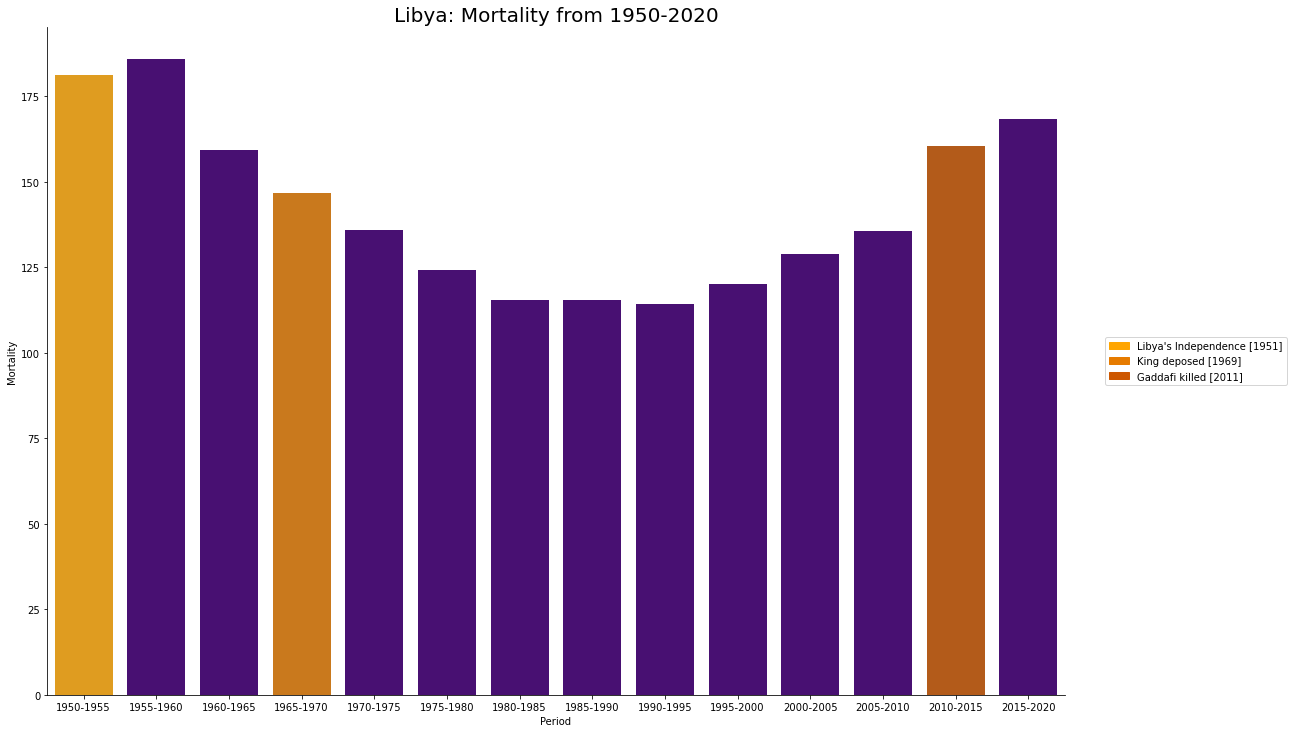

The Mortality changed by 2.55% post Libya's Independence
The Mortality changed by -14.75% post King deposed
The Mortality changed by 24.23% post Gaddafi killed


In [32]:
plot_barchart(consolidated_df,'Libya','Period','mortality_all_gender','Libya: Mortality from 1950-2020','Period','Mortality')

##### *The above plot shows the mortality variation with the period of time for Libya and highlighted colors are the major events mentioned before. There is a slight rise in mortality post independence. it then started decreasing and suprisingly, kept decreasing even after Gaddafi came into power. Then the mortality started increasing from year 1995-2000 and kept increasing till 2015-2020*

##### *The plot depicts that there is 24.23% rise in the mortality post the killing of Gaddafi which rejects our hypothesis which expects a fall in the same.*

### Deep diving into the variation of mortality of male and female and depicting the correlation between them.
If we were to go forward and draw a comparison between male and female mortality to get a better insight on the basis of gender, the below dynamically created function can be used. Any country and social factor can be passed in this for getting the insights from the graphs. There are multiple parameters declared and described in the function. 

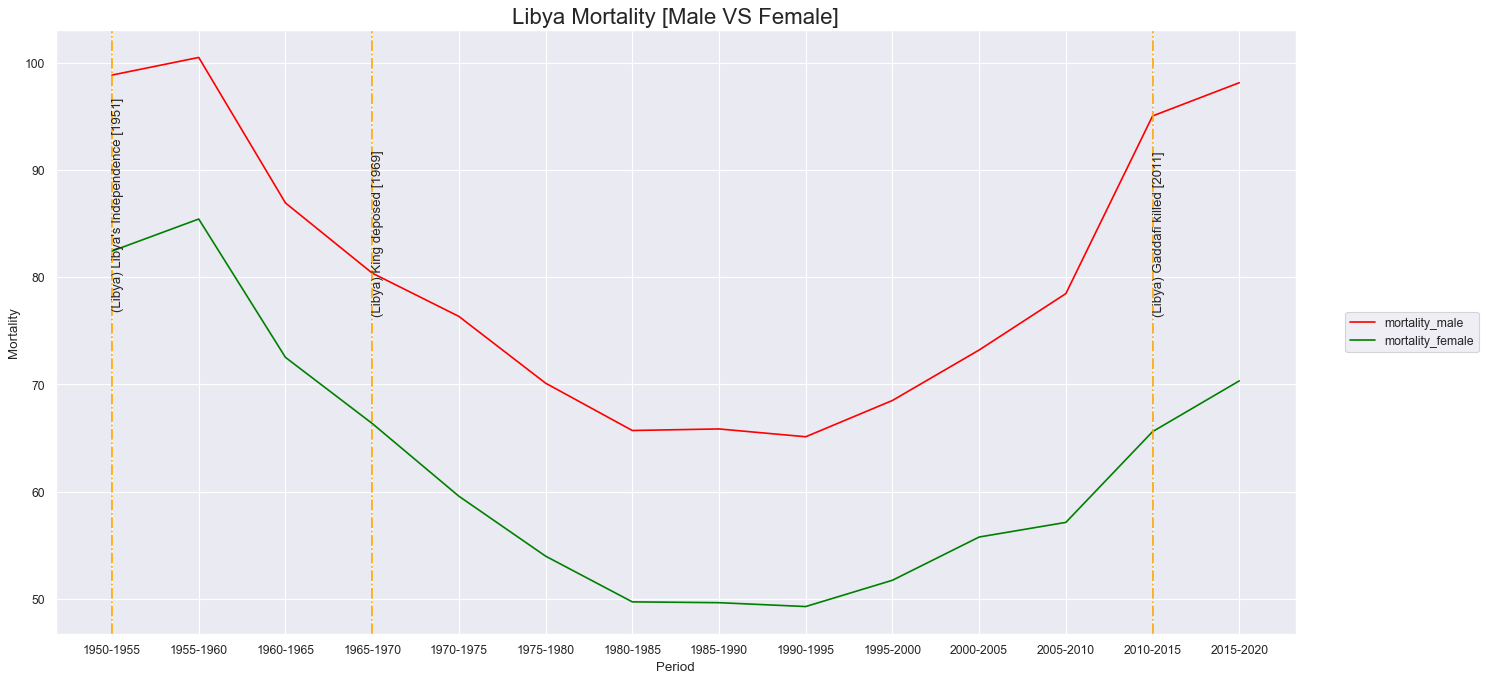

In [33]:
plot_linechart(consolidated_df,
               ['Libya'],
               'Period','Mortality',
               ['mortality_male','mortality_female'],
               'mortality_type',
               title='Libya Mortality [Male VS Female]')

##### *The above plot shows that there is quite a variance in the mortality of both male and female in Libya over the course of time. The vertical dashed line shows the events occured in different periods of the country. On the X axis we have Period and on the Y axis the graph displays mortality.*

##### *We can observe that the mortality of male is always greater than the female mortality but they both follow the same trend which we observed in the overall mortality as well.*

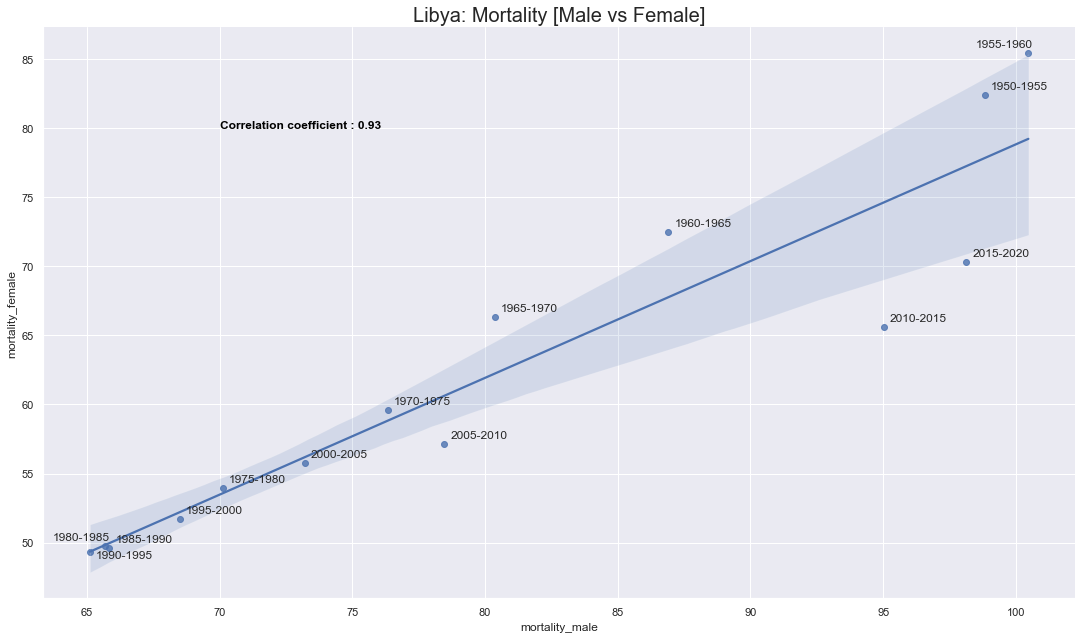

In [34]:
plot_correlation(consolidated_df,'Libya','mortality_male','mortality_female','Period','Libya: Mortality [Male vs Female]',text_pos=[70,80])

##### *The above plot clearly depicts the positive correlation between the mortality of male and female with a strong correlation coefficient of 0.93*

--------------------------------------------------------------------------------------------------------------------------------

## Hypothesis 2
According to us, people will be less motivated to migrate from a country where there is a higher life expectancy. Hence, below is the second hypothesis.

##### *In most of the cases with an increase in life-expectancy, the net migration decreases i.e. life-expectancy and net migration are negatively correlated.*

### Correlating Life Expectancy with Net Migration 

* Net Migration is calculated as the number of IMMIGRANTS minus the number of EMIGRANTS. Expressed in thousands

* Life Expectancy is the the average number of years of life of individuals who would be subject to the mortality rates of a given period. It is expressed as years.



In [35]:
interested_countries=['Afghanistan','Germany','Venezuela, Republic of','Libya','Myanmar','Iraq']
filter_condition=consolidated_df['Country'].isin(interested_countries)
filtered_df=consolidated_df[filter_condition]
filtered_df.groupby('Country')[['migration','life_expectancy_all_gender']].corr()

migration  life_expectancy_all_gender
Country                                                                      
Afghanistan migration                    1.000000                    0.072894
            life_expectancy_all_gender   0.072894                    1.000000
Germany     migration                    1.000000                    0.560483
            life_expectancy_all_gender   0.560483                    1.000000
Iraq        migration                    1.000000                   -0.024649
            life_expectancy_all_gender  -0.024649                    1.000000
Libya       migration                    1.000000                   -0.418671
            life_expectancy_all_gender  -0.418671                    1.000000
Myanmar     migration                    1.000000                   -0.759127
            life_expectancy_all_gender  -0.759127                    1.000000

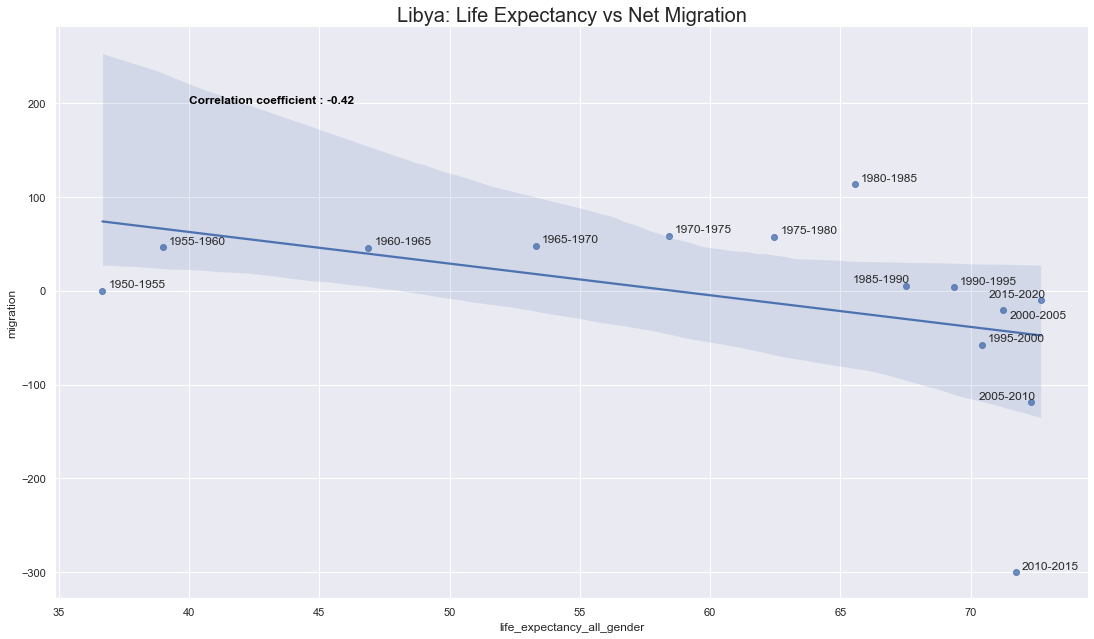

In [36]:
plot_correlation(consolidated_df,'Libya',
                 'life_expectancy_all_gender',
                 'migration',
                 'Period',
                 'Libya: Life Expectancy vs Net Migration',text_pos=[40,200])

##### *The correlation between the migration and life expectancy is negatively correlated with a coefficient of -0.42. The points shows the period range for the respective relation. There is a steep drop in the relation during the period 2010-2015 which also was the period when Gaddafi was killed.*

##### *As the expectancy increases, the migration seems to have more negative value, which means people are moving out of the country. This is a surprising observation*

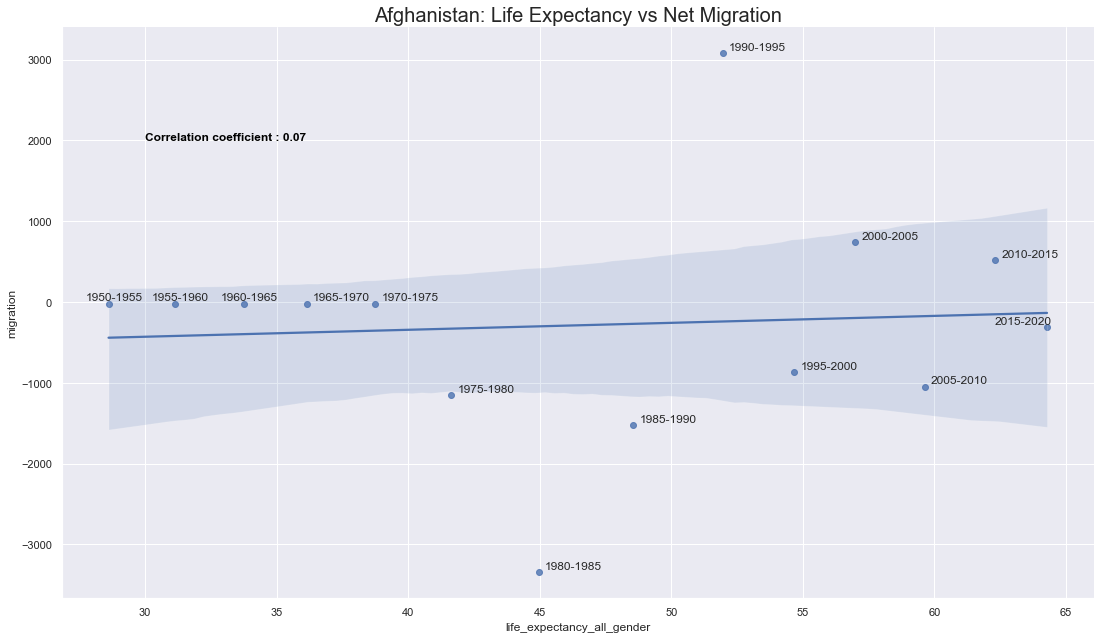

In [37]:
plot_correlation(consolidated_df,'Afghanistan',
                 'life_expectancy_all_gender','migration','Period',
                 'Afghanistan: Life Expectancy vs Net Migration',
                 text_pos=[30,2000])

##### *The correlation between the migration and life expectancy of all gender is positively correlated with a small coefficient of 0.07 for Afghanistan. For the initial few years, the net migration is near to 0. One possible reason can be due to the correct data not being recorded or people actually didn't migrate at all.*  
##### *There is a steep drop in the migration during the period 1980-1985 which also was the period when Soviet Union had invaded the country. There was civil war in the period of 1990-1995 where we observed an abrupt rise in the miration when compared with the life expectancy.* 



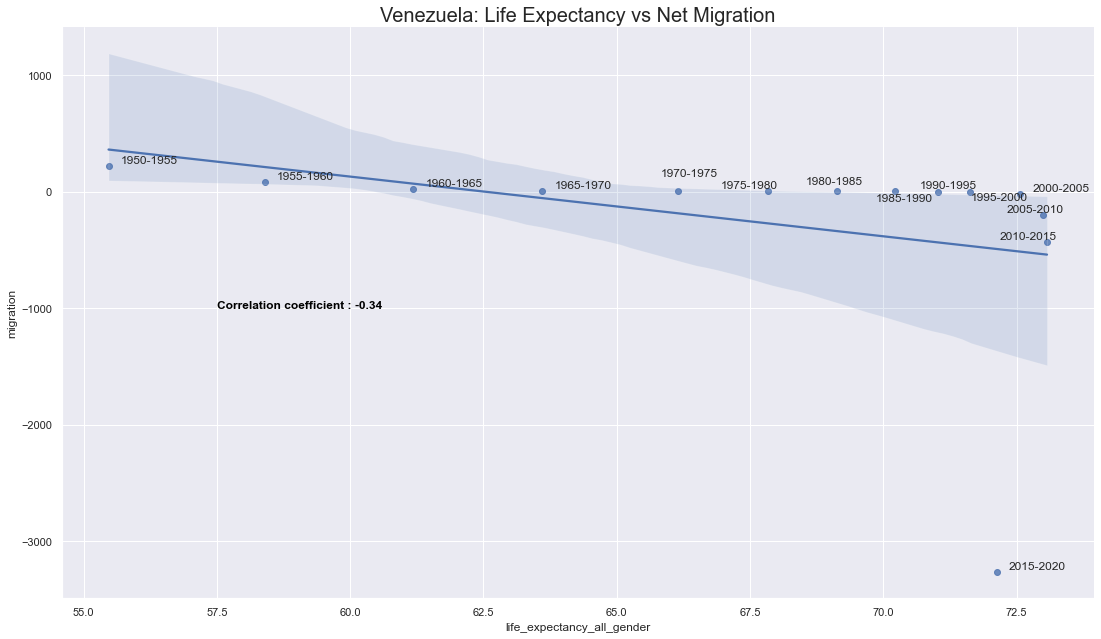

In [38]:
plot_correlation(consolidated_df,'Venezuela',
                 'life_expectancy_all_gender','migration','Period',
                 'Venezuela: Life Expectancy vs Net Migration',text_pos=[57.5,-1000])

##### *The correlation between the migration and life expectancy of all gender is negatively correlated with a coefficient of -0.34 for Venezuela. The initial values are somewhat near to 0, which suggests that the correct data was not recorded or there is not migration from or to the country. There is strong negative correlation towards the end of the period.*

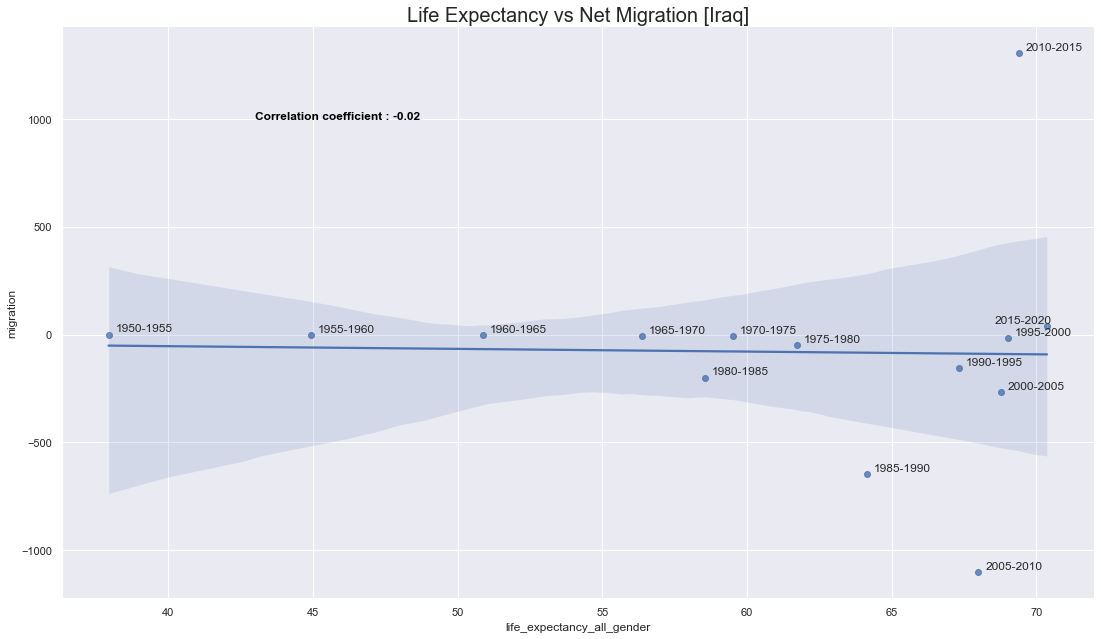

In [39]:
plot_correlation(consolidated_df,'Iraq',
                 'life_expectancy_all_gender','migration','Period',
                 'Life Expectancy vs Net Migration [Iraq]',text_pos=[43,1000])

##### *We can observe here that initial migration values are near to 0 which suggests that the data is not recorded at all in the initial years. The correlation coefficient is -0.02 which is slightly less than 0. We can say that for Iraq, based on the data we have, life expectancy and migration are not significantly correlated.*

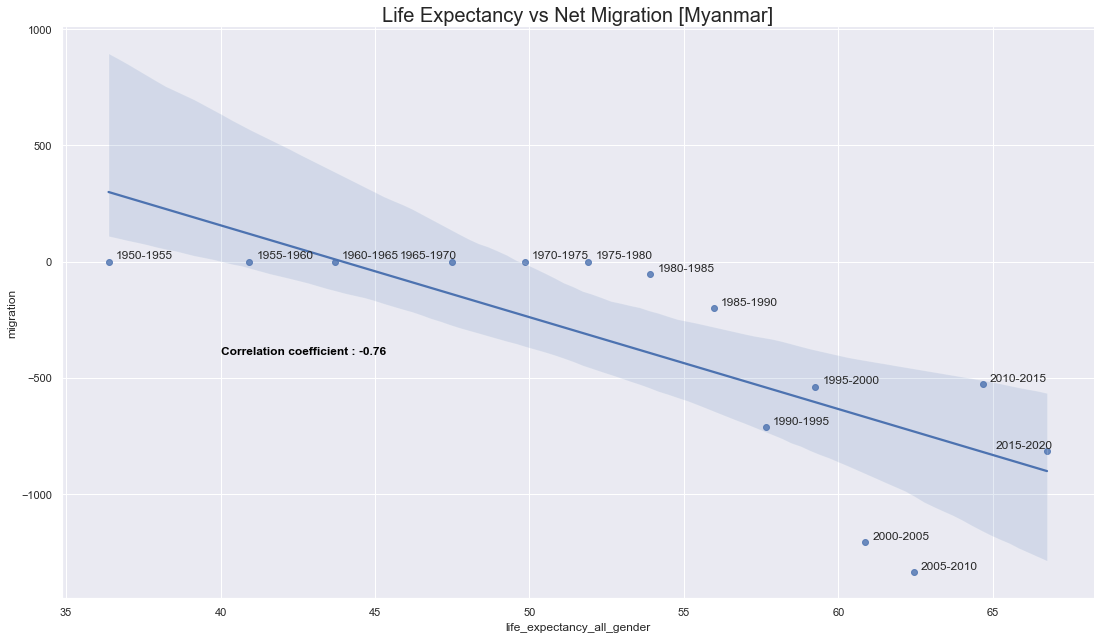

In [40]:
plot_correlation(consolidated_df,'Myanmar',
                 'life_expectancy_all_gender','migration','Period',
                 'Life Expectancy vs Net Migration [Myanmar]',text_pos=[40,-400])

##### *Similar to the above scenarios, the data is not significant before 1975-1980. Post that period, we can observe a strong negative correlation between the life expectancy and migration with an overall correlation coefficient of -0.76*

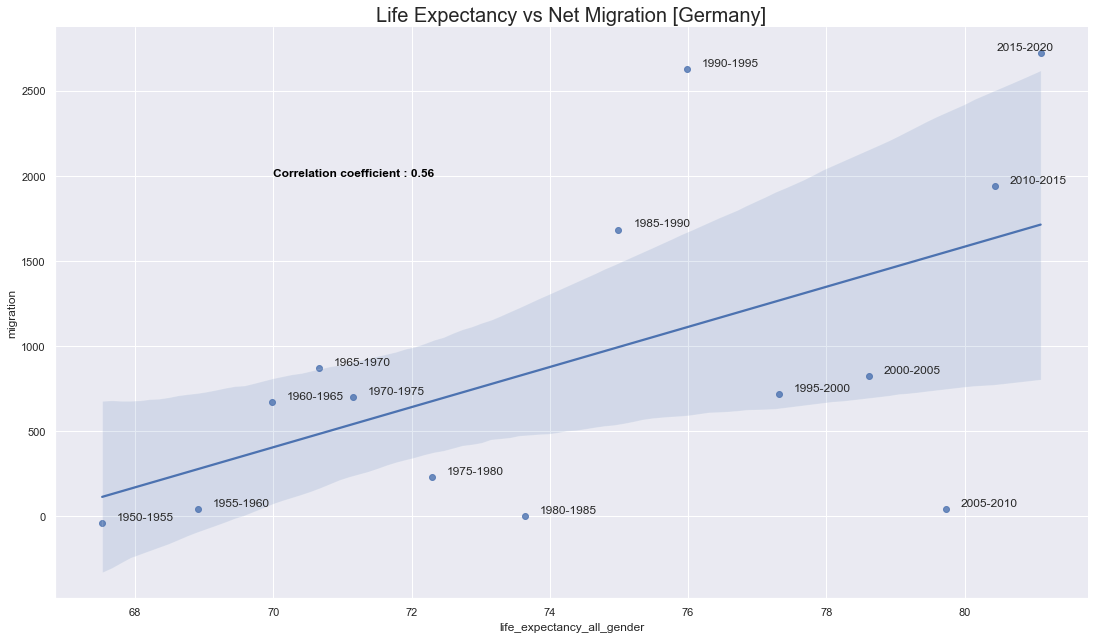

In [41]:
plot_correlation(consolidated_df,'Germany',
                 'life_expectancy_all_gender','migration','Period',
                 'Life Expectancy vs Net Migration [Germany]',text_pos=[70,2000])

##### For Germany, we observe a positive correlation cofficient of 0.56. We can also observe that the migration is mostly positive which means that there are more immigrants than emigrants. 

From the above analysis, we can observe that most of the countries had a negative correlation between life expectancy and migration. This means that even after the increase in life expectancy, there is no increase in the incoming population. This might depend of different factors which are not considered here for the variable.

We can notice that Germany had a good positive relation between life expectancy and migration which was the only case where our hypothesis satisfied. Apart from that, we can not prove our hypothesis based on the given data and plots which means, the hypothesis is rejected. One thing to notice is that, there were few countries where the migration data were nearly 0 during initial period and that might have impacted the outcome. Also, Germany is ony the country counted in the developed nations where as others are under-developed or developing nations. This along with other unknown factors might have impacted the correlation as well. 

--------------------------------------------------------------------------------------------------------------------------------

## Hypothesis 3

Since Angela Merkel was the First Woman Chancellor of Germany elected in 2005, it is a reasonable assumption that it would have led to a society which is oriented towards the interest of women. Keeping that in mind, we expect the women in Germany to flourish and hence, below is the third hypothesis.

##### Post the election of Angela Merkel as the first woman Chancellor of Germany in 2005, the female mortality rate before age 60 has decreased along with it being lower than the male mortality rate before age 60, post Angela Merkel's election.

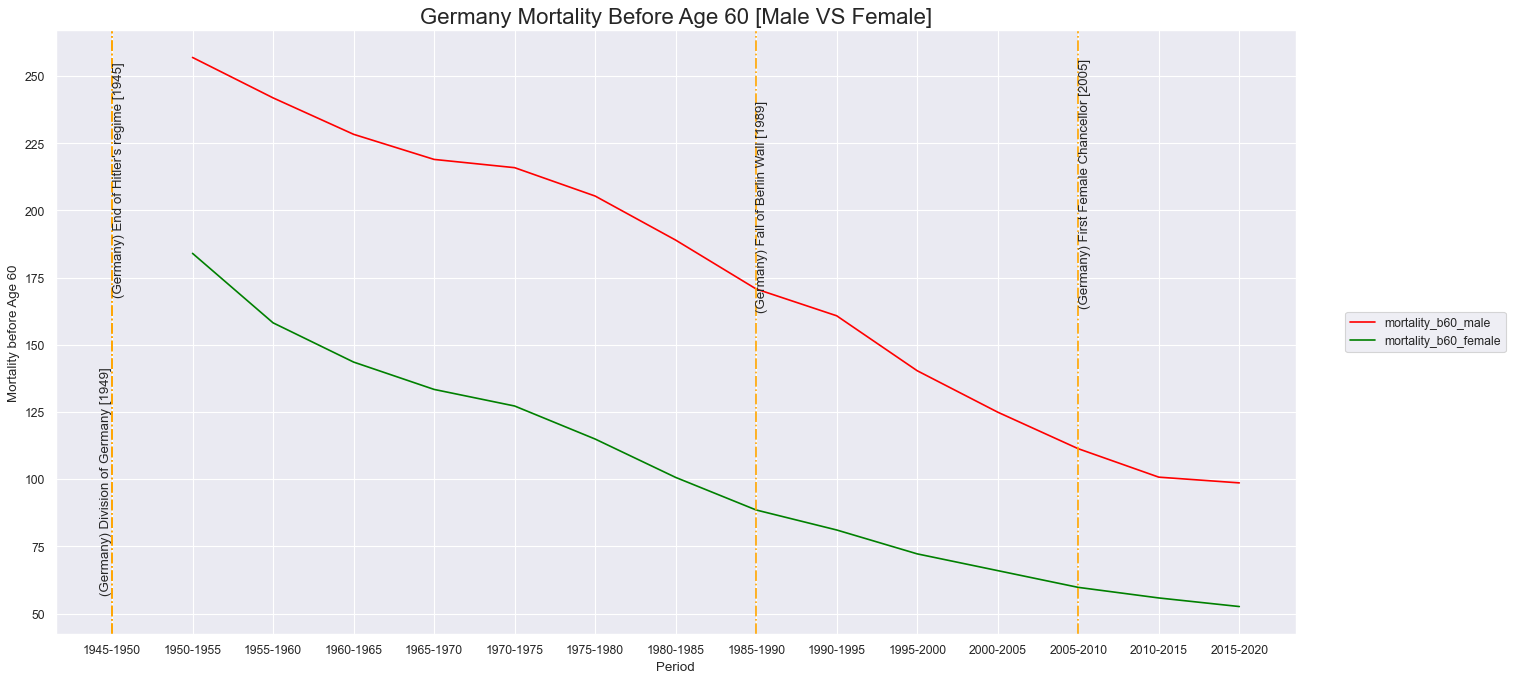

In [42]:
plot_linechart(consolidated_df,['Germany'],'Period','Mortality before Age 60',['mortality_b60_male','mortality_b60_female'],'mortality_type',title='Germany Mortality Before Age 60 [Male VS Female]')

#### *In the above visual, we can observe that there is continuous decrease in the mortality before 60 for both males and females. The vertical dashed lines show the regime changes in Germany. While pondering upon the data, we can observe that after the election of Angela Merkel as the first Chancellor, the female mortality under 60 has decreased. Also we can notice from the graph that the difference between the male and female mortality under 60 has decreased*

To understand more about the data and the comparison for the hypothesis, below is a table which depicts the percentage increase/decrease in the pre/post event.

In [54]:
display(calculate_percent_change(consolidated_df,
                                 ['Germany'],
                                 level_two=['male','female'],
                                 calc_attrs=['mortality_b60_male','mortality_b60_female'],
                                 level_two_name='Gender',
                                 pre_name="Mean Mortality Under Age 60 [Pre]",
                                 post_name='Mean Mortality Under Age 60 [Post]'))

Period                    Event  \
Country Gender Year                                       
Germany female 1945  1945-1950   End of Hitler's regime   
               1949  1945-1950      Division of Germany   
               1989  1985-1990      Fall of Berlin Wall   
               2005  2005-2010  First Female Chancellor   
        male   1945  1945-1950   End of Hitler's regime   
               1949  1945-1950      Division of Germany   
               1989  1985-1990      Fall of Berlin Wall   
               2005  2005-2010  First Female Chancellor   

                     Mean Mortality Under Age 60 [Pre]  \
Country Gender Year                                      
Germany female 1945                                NaN   
               1949                                NaN   
               1989                             137.44   
               2005                              73.11   
        male   1945                                NaN   
               1949                                NaN   
               1989                             222.33   
               2005                             142.03   

                     Mean Mortality Under Age 60 [Post]  % Change  
Country Gender Year                                                
Germany female 1945                              137.44       NaN  
               1949                              137.44       NaN  
               1989                               73.11    -46.81  
               2005                               54.22    -25.84  
        male   1945                              222.33       NaN  
               1949                              222.33       NaN  
               1989                              142.03    -36.12  
               2005                               99.70    -29.80

#### *The above table helps us in getting a better insights of how the mortality rate changes within two events. This can be calculated for any country and social factor due to the dynamic ability of the function. As we can observe, there is 25.84% decrease in the female mortality under 60 after the appointment of first female Chancellor*

The above analysis shows that the hypothesis can be accepted as after Angela Merkel was elected, there is decrease in female mortality under 60 and along with that, there is decrease in the difference of the mortality as well between male and female.

Note : The NaN values which are shown are due to the fact that no data exists in our dataframe for values before the corresponding period.

## Hypothesis 4

It is a common notion that women in advanced societies bear child in a much older age than the women in underdeveloped or developing countries. Hence, below is the final hypothesis. 

##### *We expect the mean age of childbearing to be higher in well-developed societies. Hence, the mean age of childbearing must have increased post the fall of the Berlin Wall in Germany in 1989. While in all the subsequent events which swayed away from democratic systems, and those that occurred in under-developed or developing countries, the mean age of childbearing remained constant or decrease.*

For the above hypothesis, we have reused the plot_linechart function to plot the events as well as the trend of mean child bearing age. 

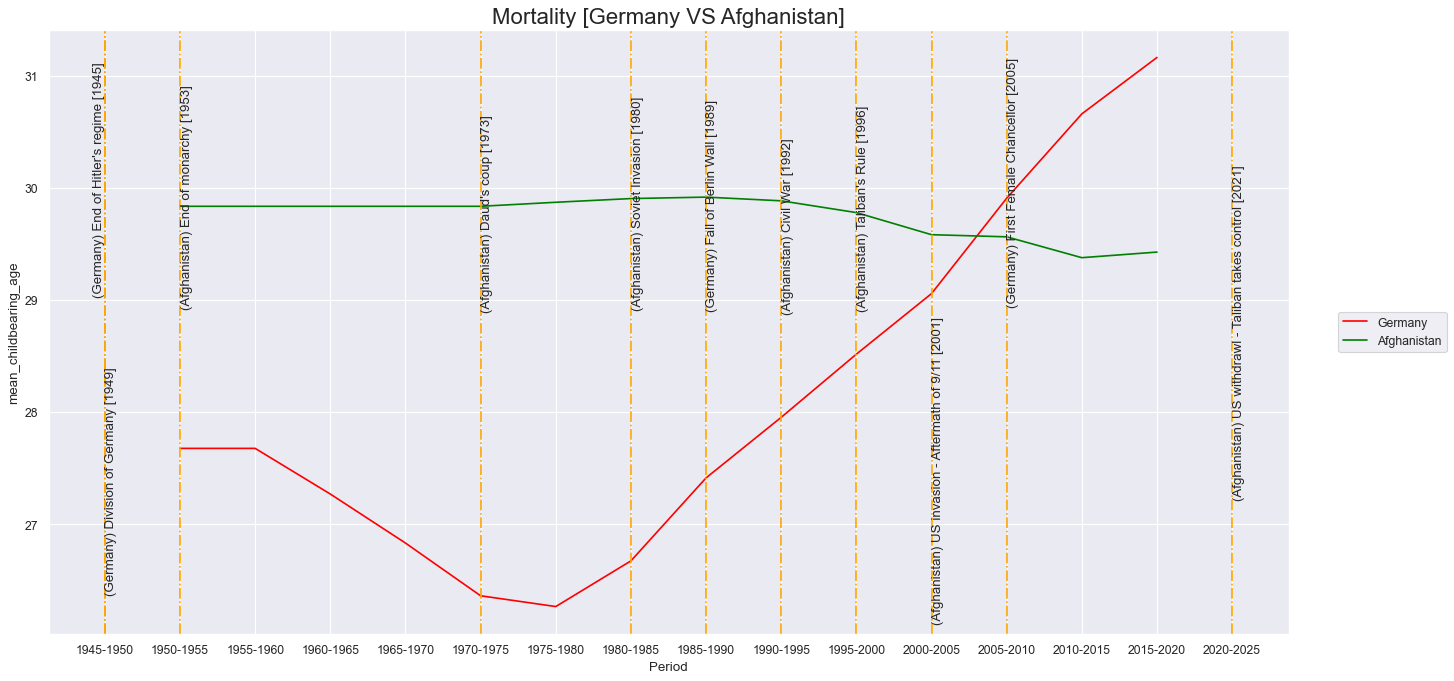

In [44]:
plot_linechart(consolidated_df,
               ['Germany','Afghanistan'],
               'Period',
               'mean_childbearing_age',
               title='Mortality [Germany VS Afghanistan]',melt_flag=False,hue='Country')

In [45]:
display(calculate_percent_change(consolidated_df,
                                 ['Germany','Afghanistan'],
                                 level_two=['Child Bearing Age'],
                                 calc_attrs=['mean_childbearing_age'],
                                 level_two_name='Parameter',
                                 pre_name="Mean Child Bearing Age 60 [Pre]",
                                 post_name='Mean Child Bearing Age 60 [Post]'))

Period  \
Country     Parameter         Year              
Germany     Child Bearing Age 1945  1945-1950   
                              1949  1945-1950   
                              1989  1985-1990   
                              2005  2005-2010   
Afghanistan Child Bearing Age 1953  1950-1955   
                              1973  1970-1975   
                              1980  1980-1985   
                              1992  1990-1995   
                              1996  1995-2000   
                              2001  2000-2005   
                              2021  2020-2025   

                                                                   Event  \
Country     Parameter         Year                                         
Germany     Child Bearing Age 1945                End of Hitler's regime   
                              1949                   Division of Germany   
                              1989                   Fall of Berlin Wall   
                              2005               First Female Chancellor   
Afghanistan Child Bearing Age 1953                       End of monarchy   
                              1973                           Daud's coup   
                              1980                       Soviet Invasion   
                              1992                             Civil War   
                              1996                        Taliban's Rule   
                              2001       US invasion - Aftermath of 9/11   
                              2021  US withdrawl - Taliban takes control   

                                    Mean Child Bearing Age 60 [Pre]  \
Country     Parameter         Year                                    
Germany     Child Bearing Age 1945                              NaN   
                              1949                              NaN   
                              1989                            26.97   
                              2005                            28.51   
Afghanistan Child Bearing Age 1953                              NaN   
                              1973                            29.84   
                              1980                            29.87   
                              1992                            29.92   
                              1996                              NaN   
                              2001                              NaN   
                              2021                            29.46   

                                    Mean Child Bearing Age 60 [Post]  % Change  
Country     Parameter         Year                                              
Germany     Child Bearing Age 1945                             26.97       NaN  
                              1949                             26.97       NaN  
                              1989                             28.51      5.71  
                              2005                             30.91      8.42  
Afghanistan Child Bearing Age 1953                             29.83       NaN  
                              1973                             29.87      0.10  
                              1980                             29.92      0.17  
                              1992                               NaN       NaN  
                              1996                               NaN       NaN  
                              2001                             29.46       NaN  
                              2021                               NaN       NaN

* As expected, the child bearing age of Germany increased whereas it decreased for Afghanistan over the span of years but it started with a constant value for around 3 decades for Afghanistan
* The value for Germany reduced in the initial phase then started increasing as expected.
* Thus, we can accept our hypothesis in this case.

Note : The NaNs being displayed for pre and post values in the aforementioned and subsequent dataframes for periods which are not at the extremes, are due to the fact that there are consecutive periods which have events present. Hence, in this case the statistics relating to a particular event are not being considered in either pre or post cases. Instead they are only being used as reference.

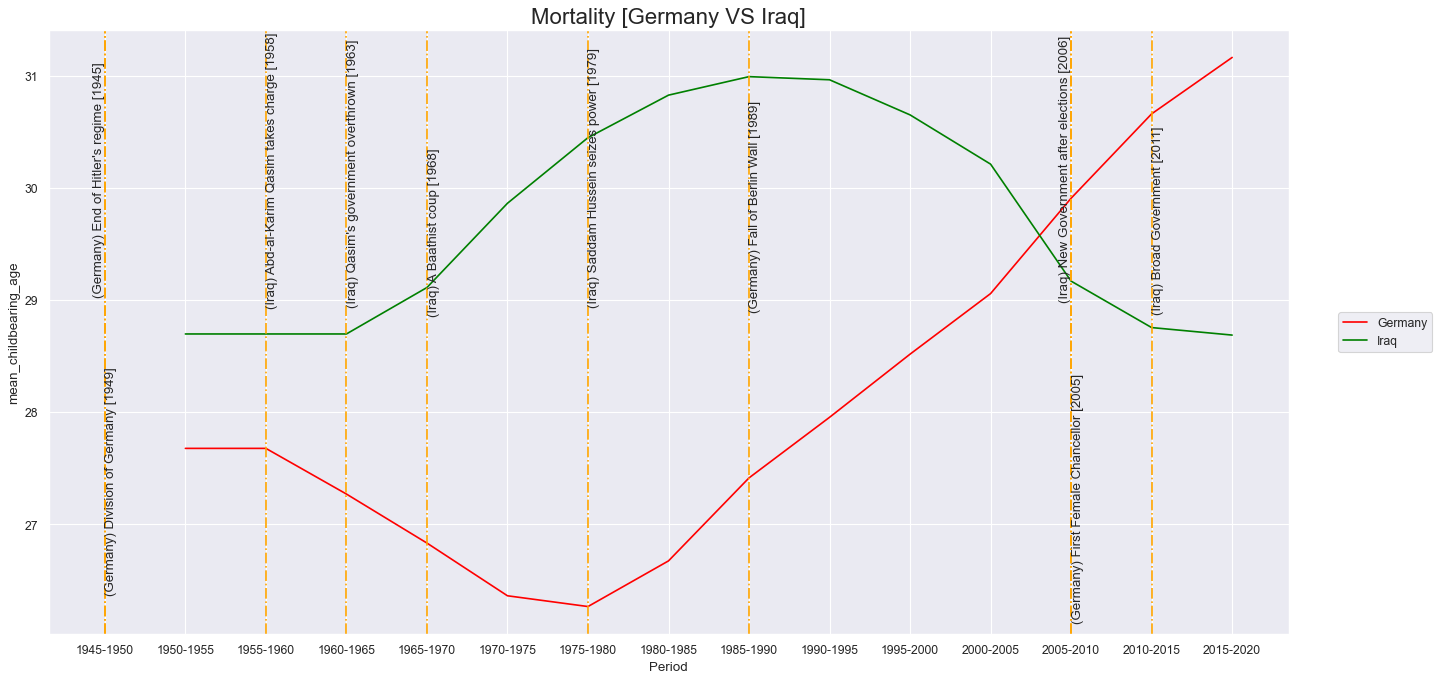

In [46]:
plot_linechart(consolidated_df,
               ['Germany','Iraq'],
               'Period',
               'mean_childbearing_age',
               title='Mortality [Germany VS Iraq]',melt_flag=False,hue='Country')

In [47]:
display(calculate_percent_change(consolidated_df,
                                 ['Germany','Iraq'],
                                 level_two=['Child Bearing Age'],
                                 calc_attrs=['mean_childbearing_age'],
                                 level_two_name='Parameter',
                                 pre_name="Mean Child Bearing Age 60 [Pre]",
                                 post_name='Mean Child Bearing Age 60 [Post]'))

Period                            Event  \
Country Parameter         Year                                               
Germany Child Bearing Age 1945  1945-1950           End of Hitler's regime   
                          1949  1945-1950              Division of Germany   
                          1989  1985-1990              Fall of Berlin Wall   
                          2005  2005-2010          First Female Chancellor   
Iraq    Child Bearing Age 1958  1955-1960  Abd-al-Karim Qasim takes charge   
                          1963  1960-1965    Qasim's government overthrown   
                          1968  1965-1970                  A Baathist coup   
                          1979  1975-1980      Saddam Hussein seizes power   
                          2006  2005-2010   New Government after elections   
                          2011  2010-2015                 Broad Government   

                                Mean Child Bearing Age 60 [Pre]  \
Country Parameter         Year                                    
Germany Child Bearing Age 1945                              NaN   
                          1949                              NaN   
                          1989                            26.97   
                          2005                            28.51   
Iraq    Child Bearing Age 1958                            28.70   
                          1963                            28.70   
                          1968                              NaN   
                          1979                            29.86   
                          2006                            30.73   
                          2011                              NaN   

                                Mean Child Bearing Age 60 [Post]  % Change  
Country Parameter         Year                                              
Germany Child Bearing Age 1945                             26.97       NaN  
                          1949                             26.97       NaN  
                          1989                             28.51      5.71  
                          2005                             30.91      8.42  
Iraq    Child Bearing Age 1958                               NaN       NaN  
                          1963                               NaN       NaN  
                          1968                             29.86       NaN  
                          1979                             30.73      2.91  
                          2006                               NaN       NaN  
                          2011                             28.69       NaN

* The graph for Iraq had certain amount of change. The Child bearning mean age increased till 1985-1990 but then started decreasing with a steep slope and returns back somewhere near to where it started 70 years ago
* The slope decreases for Iraq towards the end.
* Even though elections took place in 2006, the mean child bearing age yet kept decreasing.
* Thus in this case we reject the hypothesis.

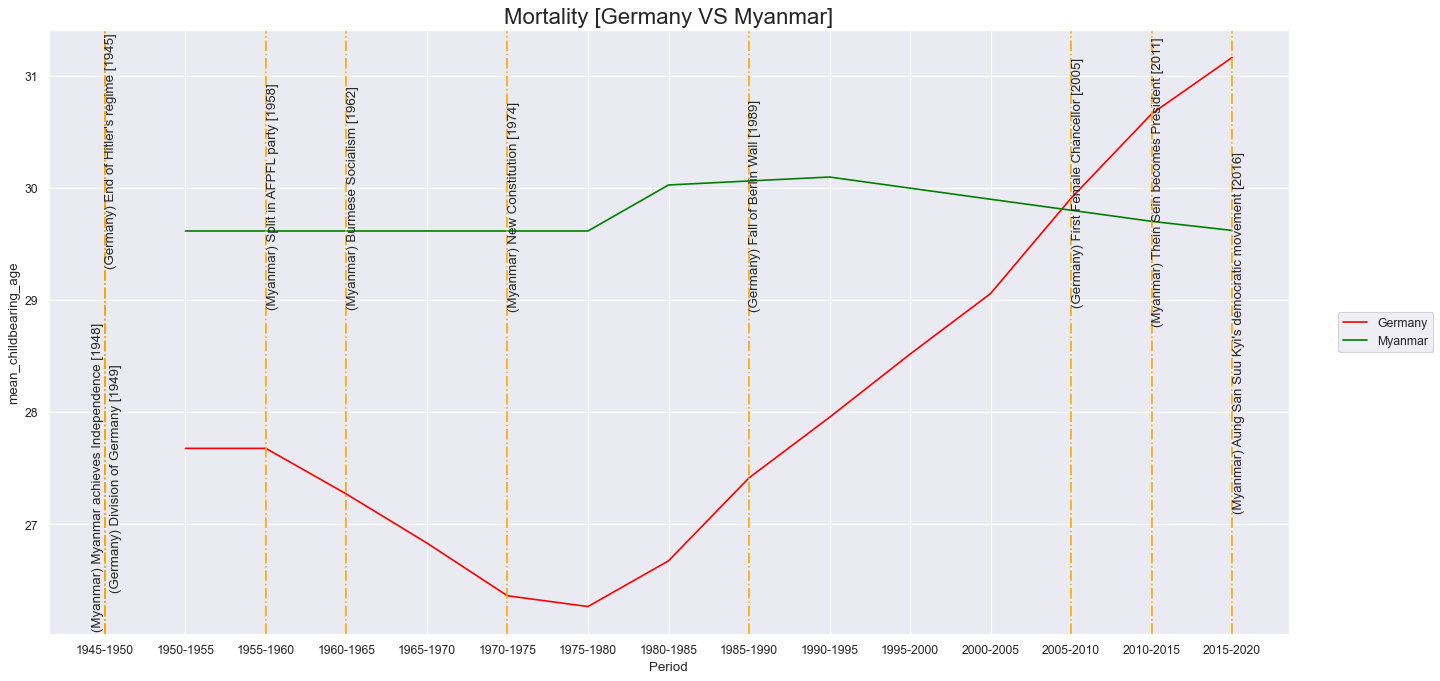

In [48]:
plot_linechart(consolidated_df,
               ['Germany','Myanmar'],
               'Period',
               'mean_childbearing_age',
               title='Mortality [Germany VS Myanmar]',melt_flag=False,hue='Country')

In [49]:
display(calculate_percent_change(consolidated_df,
                                 ['Germany','Myanmar'],
                                 level_two=['Child Bearing Age'],
                                 calc_attrs=['mean_childbearing_age'],
                                 level_two_name='Parameter',
                                 pre_name="Mean Child Bearing Age 60 [Pre]",
                                 post_name='Mean Child Bearing Age 60 [Post]'))

Period  \
Country Parameter         Year              
Germany Child Bearing Age 1945  1945-1950   
                          1949  1945-1950   
                          1989  1985-1990   
                          2005  2005-2010   
Myanmar Child Bearing Age 1948  1945-1950   
                          1958  1955-1960   
                          1962  1960-1965   
                          1974  1970-1975   
                          2011  2010-2015   
                          2016  2015-2020   

                                                                 Event  \
Country Parameter         Year                                           
Germany Child Bearing Age 1945                  End of Hitler's regime   
                          1949                     Division of Germany   
                          1989                     Fall of Berlin Wall   
                          2005                 First Female Chancellor   
Myanmar Child Bearing Age 1948           Myanmar achieves Independence   
                          1958                    Split in AFPFL party   
                          1962                       Burmese Socialism   
                          1974                        New Constitution   
                          2011            Thein Sein becomes President   
                          2016  Aung San Suu Kyi's democratic movement   

                                Mean Child Bearing Age 60 [Pre]  \
Country Parameter         Year                                    
Germany Child Bearing Age 1945                              NaN   
                          1949                              NaN   
                          1989                            26.97   
                          2005                            28.51   
Myanmar Child Bearing Age 1948                              NaN   
                          1958                            29.61   
                          1962                              NaN   
                          1974                            29.61   
                          2011                            29.93   
                          2016                              NaN   

                                Mean Child Bearing Age 60 [Post]  % Change  
Country Parameter         Year                                              
Germany Child Bearing Age 1945                             26.97       NaN  
                          1949                             26.97       NaN  
                          1989                             28.51      5.71  
                          2005                             30.91      8.42  
Myanmar Child Bearing Age 1948                             29.61       NaN  
                          1958                               NaN       NaN  
                          1962                             29.61       NaN  
                          1974                             29.93      1.08  
                          2011                               NaN       NaN  
                          2016                               NaN       NaN

* In case of Myanmar, the child bearing age started increasing with Germany in period 1975-1980
* Then towards the recent years, the bearing age for Myanmar has reduced.
* The bearing age for Germany in start of the 1950s was less than Myanmar, but it later turns out to more towards the end of 2020
* Thus, we can not clearly reject the hypothesis here as there is no significant change for Myanmar.

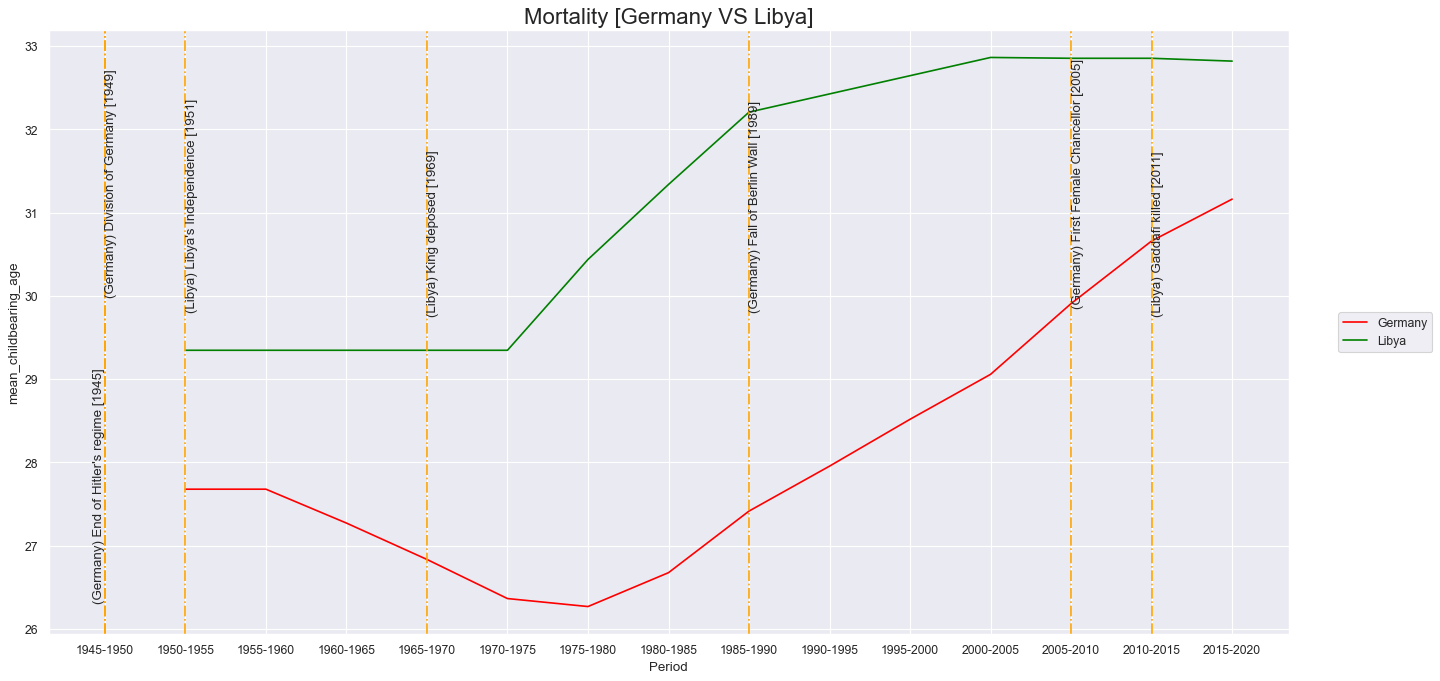

In [50]:
plot_linechart(consolidated_df,
               ['Germany','Libya'],
               'Period',
               'mean_childbearing_age',
               title='Mortality [Germany VS Libya]',melt_flag=False,hue='Country')

In [51]:
display(calculate_percent_change(consolidated_df,
                                 ['Germany','Libya'],
                                 level_two=['Child Bearing Age'],
                                 calc_attrs=['mean_childbearing_age'],
                                 level_two_name='Parameter',
                                 pre_name="Mean Child Bearing Age 60 [Pre]",
                                 post_name='Mean Child Bearing Age 60 [Post]'))

Period                    Event  \
Country Parameter         Year                                       
Germany Child Bearing Age 1945  1945-1950   End of Hitler's regime   
                          1949  1945-1950      Division of Germany   
                          1989  1985-1990      Fall of Berlin Wall   
                          2005  2005-2010  First Female Chancellor   
Libya   Child Bearing Age 1951  1950-1955     Libya's Independence   
                          1969  1965-1970             King deposed   
                          2011  2010-2015           Gaddafi killed   

                                Mean Child Bearing Age 60 [Pre]  \
Country Parameter         Year                                    
Germany Child Bearing Age 1945                              NaN   
                          1949                              NaN   
                          1989                            26.97   
                          2005                            28.51   
Libya   Child Bearing Age 1951                              NaN   
                          1969                            29.35   
                          2011                            31.76   

                                Mean Child Bearing Age 60 [Post]  % Change  
Country Parameter         Year                                              
Germany Child Bearing Age 1945                             26.97       NaN  
                          1949                             26.97       NaN  
                          1989                             28.51      5.71  
                          2005                             30.91      8.42  
Libya   Child Bearing Age 1951                             29.35       NaN  
                          1969                             31.76      8.21  
                          2011                             32.82      3.34

* In case of Libya, the trend is totally opposite to our expectations.
* The child bearing age is more than Germany from start to end.
* There is a slight decrease in the child bearing age for Libya towards the end of period 2015-2020
* Thus, we can reject the hypothesis in this case.

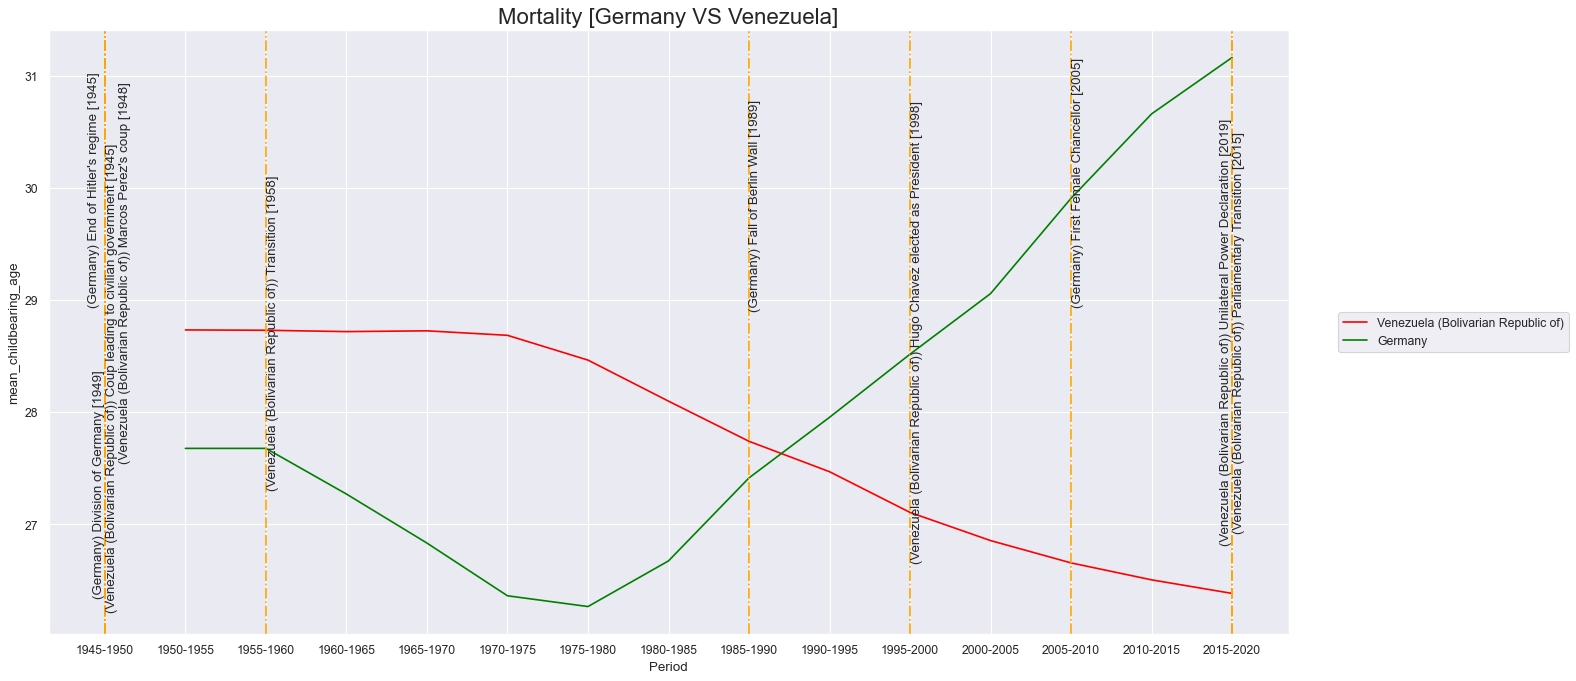

In [52]:
plot_linechart(consolidated_df,
               ['Germany','Venezuela'],
               'Period',
               'mean_childbearing_age',
               title='Mortality [Germany VS Venezuela]',melt_flag=False,hue='Country')

In [53]:
display(calculate_percent_change(consolidated_df,
                                 ['Germany','Venezuela'],
                                 level_two=['Child Bearing Age'],
                                 calc_attrs=['mean_childbearing_age'],
                                 level_two_name='Parameter',
                                 pre_name="Mean Child Bearing Age 60 [Pre]",
                                 post_name='Mean Child Bearing Age 60 [Post]'))

Period  \
Country   Parameter         Year              
Germany   Child Bearing Age 1945  1945-1950   
                            1949  1945-1950   
                            1989  1985-1990   
                            2005  2005-2010   
Venezuela Child Bearing Age 1945  1945-1950   
                            1948  1945-1950   
                            1958  1955-1960   
                            1998  1995-2000   
                            2015  2015-2020   
                            2019  2015-2020   

                                                                Event  \
Country   Parameter         Year                                        
Germany   Child Bearing Age 1945               End of Hitler's regime   
                            1949                  Division of Germany   
                            1989                  Fall of Berlin Wall   
                            2005              First Female Chancellor   
Venezuela Child Bearing Age 1945  Coup leading to civilian government   
                            1948                  Marcos Perez's coup   
                            1958                           Transition   
                            1998     Hugo Chavez elected as President   
                            2015             Parliamentary Transition   
                            2019         Unilateral Power Declaration   

                                  Mean Child Bearing Age 60 [Pre]  \
Country   Parameter         Year                                    
Germany   Child Bearing Age 1945                              NaN   
                            1949                              NaN   
                            1989                            26.97   
                            2005                            28.51   
Venezuela Child Bearing Age 1945                              NaN   
                            1948                              NaN   
                            1958                            28.73   
                            1998                            28.27   
                            2015                            26.67   
                            2019                            26.67   

                                  Mean Child Bearing Age 60 [Post]  % Change  
Country   Parameter         Year                                              
Germany   Child Bearing Age 1945                             26.97       NaN  
                            1949                             26.97       NaN  
                            1989                             28.51      5.71  
                            2005                             30.91      8.42  
Venezuela Child Bearing Age 1945                             28.73       NaN  
                            1948                             28.73       NaN  
                            1958                             28.27     -1.60  
                            1998                             26.67     -5.66  
                            2015                               NaN       NaN  
                            2019                               NaN       NaN

* The Child bearing age of Venezuela has decreased drastically over the span of time.
* Thus we can say that our hypothesis is true in this scenario.

### Conclusion

By this analysis we come to the conclusion that many of our preconceived notions about the soical factors of various countries and regimes across the world have been debunked. Hence a closer look needs to be taken as to what are the actions taken under certain regimes which are causing the observed effects on the various social parameters studied above.